In [ ]:
# Jupyter notebook in Jupytext format

## Initialisation

In [7]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path)
print(f"Project path set to: {os.getcwd()}")

Project path set to: c:\Github\ode-biomarker-project


In [8]:
from PathLoader import PathLoader #noqa: E402

path_loader = PathLoader("data_config.env", "current_user.env")

In [9]:
from DataLink import DataLink #noqa: E402

data_link = DataLink(path_loader, "data_codes.csv")

In [10]:
folder_name = "ThesisResult5-ModelSelectionBenchmark"
exp_id = "v1_fixed_network_mrmr_d3"

if not os.path.exists(f"{path_loader.get_data_path()}data/results/{folder_name}"):
    os.makedirs(f"{path_loader.get_data_path()}data/results/{folder_name}")

file_save_path = f"{path_loader.get_data_path()}data/results/{folder_name}/"

In [11]:
# Load saved model selection benchmark data
import pandas as pd
import time

# Create a new report file for capturing print statements
print_report_path = f"{file_save_path}model_selection_print_report_{exp_id}.md"
print_report_file = open(print_report_path, 'w', encoding='utf-8')

# Write header to the print report
print_report_file.write(f"# Model Selection Print Report - {exp_id}\n\n")
print_report_file.write(f"**Generated**: {time.strftime('%Y-%m-%d %H:%M:%S')}\n\n")
print_report_file.write("This report captures all print statements from the Results section with proper formatting.\n\n")

def save_and_print(message, report_file=None, level="info"):
    """
    Print message to console and save to report file with proper formatting.
    
    Args:
        message: The message to print and save
        report_file: File object to save to (optional)
        level: Formatting level - "header", "section", "subsection", or "info"
    """
    # Print to console
    print(message)
    
    # Save to report with proper formatting
    if report_file:
        if level == "header":
            report_file.write(f"# {message}\n\n")
        elif level == "section":
            report_file.write(f"## {message}\n\n")
        elif level == "subsection":
            report_file.write(f"### {message}\n\n")
        else:  # info level
            report_file.write(f"{message}\n\n")
    
    return message

# Load the model selection benchmark data
pkl_path = f"{path_loader.get_data_path()}data/results/{folder_name}/model_selection_benchmark_{exp_id}.pkl"
if not os.path.exists(pkl_path):
    raise FileNotFoundError(f"Model selection benchmark pickle not found: {pkl_path}")

df_benchmark = pd.read_pickle(pkl_path)
save_and_print(f"Loaded model selection benchmark with shape: {df_benchmark.shape}", print_report_file, level="section")

# Display first rows
try:
    from IPython.display import display
    display(df_benchmark.head())
except Exception:
    save_and_print(df_benchmark.head().to_string(), print_report_file, level="info")

Loaded model selection benchmark with shape: (280, 17)


,rng,condition,feature_importance,feature_importance_from,model_performance,metrics,selected_features,model_name,selected_scores,k,y_pred,y_true_index,feature_selection_time,model_training_time,prediction_time,k_value,method
0,15795,RandomForestRegressor_config1_k100_mrmr_networ...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.428893,"{'r2': 0.4288928818186838, 'pearson_r': 0.6657...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",RandomForestRegressor,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.733970930000001, 4.781092699999999, 4.46556...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.804476,5.040230,0.009751,100,k100
1,15795,RandomForestRegressor_config2_k100_mrmr_networ...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.392319,"{'r2': 0.39231863644205067, 'pearson_r': 0.635...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",RandomForestRegressor,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.418080659843573, 4.605261434135601, 4.24247...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.850976,1.036597,0.018756,100,k100
2,15795,LinearRegression_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.500428,"{'r2': 0.5004282579431936, 'pearson_r': 0.7151...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",LinearRegression,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.687706989702075, 5.016514733241056, 3.59645...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.849925,0.008566,0.001796,100,mrmr
3,15795,KNeighborsRegressor_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.343099,"{'r2': 0.34309939087839436, 'pearson_r': 0.599...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",KNeighborsRegressor,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[3.613831318607585, 4.9197283470607625, 4.6823...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.928926,0.002842,0.056477,100,mrmr
4,15795,SVR_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.453311,"{'r2': 0.45331113130476464, 'pearson_r': 0.680...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.027830856405467, 5.308590042528847, 3.69435...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.945528,0.978231,0.004545,100,mrmr


## Data Structure Analysis

In [12]:
# Parse condition column to extract model configurations correctly
def parse_condition_column(df_benchmark):
    """Parse the condition column to extract model_name, k_value, and method correctly"""
    
    save_and_print("## Parsing Condition Column", print_report_file, level="section")
    save_and_print("Parsing condition column to extract correct model_name, k_value, and method", print_report_file, level="info")
    
    # Create new columns based on condition parsing
    parsed_data = []
    
    for idx, row in df_benchmark.iterrows():
        condition = row['condition']
        
        # Parse the condition format: {model_name}_k{value}_{method}
        # Example: "RandomForestRegressor_config1_k100_mrmr_network_d3"
        parts = condition.split('_')
        
        # Extract model name (everything before the k-value part)
        model_parts = []
        k_value = None
        method_name = None
        
        for part in parts:
            if part.startswith('k'):
                # Found k-value part, extract numeric value
                k_value = int(part[1:])  # Remove 'k' prefix and convert to int
                # Everything before this is the model name
                model_name = '_'.join(model_parts)
                # Everything after this is the method
                method_parts = parts[parts.index(part) + 1:]
                method_name = '_'.join(method_parts)
                break
            else:
                model_parts.append(part)
        
        # If we didn't find a k-value (shouldn't happen with valid data)
        if k_value is None:
            save_and_print(f"Warning: Could not parse k-value from condition: {condition}", print_report_file, level="info")
            model_name = '_'.join(model_parts[:-1]) if len(model_parts) > 1 else model_parts[0]
            method_name = parts[-1] if parts else 'unknown'
            k_value = 0
        
        parsed_data.append({
            'condition': condition,
            'parsed_model_name': model_name,
            'parsed_k_value': k_value,
            'parsed_method': method_name
        })
    
    # Create a DataFrame with parsed values
    parsed_df = pd.DataFrame(parsed_data)
    
    # Update the dataframe with parsed values
    df_benchmark['model_name'] = parsed_df['parsed_model_name']
    df_benchmark['k_value'] = parsed_df['parsed_k_value']
    df_benchmark['method'] = parsed_df['parsed_method']
    
    save_and_print("Dataframe columns updated with correctly parsed values", print_report_file, level="info")
    
    # Show unique values after parsing
    save_and_print("### Unique Values After Parsing", print_report_file, level="subsection")
    save_and_print(f"Models: {df_benchmark['model_name'].unique()}", print_report_file, level="info")
    save_and_print(f"K-values: {sorted(df_benchmark['k_value'].unique())}", print_report_file, level="info")
    save_and_print(f"Methods: {df_benchmark['method'].unique()}", print_report_file, level="info")
    
    return df_benchmark

# Apply the parsing fix
df_benchmark = parse_condition_column(df_benchmark)

# Display first rows after parsing
try:
    display(df_benchmark.head())
except Exception:
    save_and_print(df_benchmark.head().to_string(), print_report_file, level="info")

## Parsing Condition Column
Parsing condition column to extract correct model_name, k_value, and method
Dataframe columns updated with correctly parsed values
### Unique Values After Parsing
Models: ['RandomForestRegressor_config1' 'RandomForestRegressor_config2'
 'LinearRegression' 'KNeighborsRegressor' 'SVR' 'MLPRegressor_config1'
 'MLPRegressor_config2']
K-values: [np.int64(100), np.int64(500)]
Methods: ['mrmr_network_d3']


,rng,condition,feature_importance,feature_importance_from,model_performance,metrics,selected_features,model_name,selected_scores,k,y_pred,y_true_index,feature_selection_time,model_training_time,prediction_time,k_value,method
0,15795,RandomForestRegressor_config1_k100_mrmr_networ...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.428893,"{'r2': 0.4288928818186838, 'pearson_r': 0.6657...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",RandomForestRegressor_config1,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.733970930000001, 4.781092699999999, 4.46556...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.804476,5.040230,0.009751,100,mrmr_network_d3
1,15795,RandomForestRegressor_config2_k100_mrmr_networ...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.392319,"{'r2': 0.39231863644205067, 'pearson_r': 0.635...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",RandomForestRegressor_config2,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.418080659843573, 4.605261434135601, 4.24247...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.850976,1.036597,0.018756,100,mrmr_network_d3
2,15795,LinearRegression_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.500428,"{'r2': 0.5004282579431936, 'pearson_r': 0.7151...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",LinearRegression,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.687706989702075, 5.016514733241056, 3.59645...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.849925,0.008566,0.001796,100,mrmr_network_d3
3,15795,KNeighborsRegressor_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.343099,"{'r2': 0.34309939087839436, 'pearson_r': 0.599...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",KNeighborsRegressor,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[3.613831318607585, 4.9197283470607625, 4.6823...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.928926,0.002842,0.056477,100,mrmr_network_d3
4,15795,SVR_k100_mrmr_network_d3,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.453311,"{'r2': 0.45331113130476464, 'pearson_r': 0.680...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"[223.43343259944592, 7719.946185515369, 595.38...",100,"[4.027830856405467, 5.308590042528847, 3.69435...","Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.945528,0.978231,0.004545,100,mrmr_network_d3


In [13]:
# Dynamically detect available models, k-values, and methods
models = df_benchmark['model_name'].unique().tolist()
k_values = sorted(df_benchmark['k_value'].unique())
methods = df_benchmark['method'].unique().tolist()

save_and_print("### Dataset Configuration Summary", print_report_file, level="subsection")
save_and_print(f"Number of models: {len(models)}", print_report_file, level="info")
save_and_print(f"Models: {models}", print_report_file, level="info")
save_and_print(f"K-values: {k_values}", print_report_file, level="info")
save_and_print(f"Methods: {methods}", print_report_file, level="info")
save_and_print(f"Total runs: {len(df_benchmark)}", print_report_file, level="info")

### Dataset Configuration Summary
Number of models: 7
Models: ['RandomForestRegressor_config1', 'RandomForestRegressor_config2', 'LinearRegression', 'KNeighborsRegressor', 'SVR', 'MLPRegressor_config1', 'MLPRegressor_config2']
K-values: [np.int64(100), np.int64(500)]
Methods: ['mrmr_network_d3']
Total runs: 280


'Total runs: 280'

In [14]:
# Create model labels for better readability
model_labels = {
    'RandomForestRegressor_config1': 'RF Config1 (100 trees)',
    'RandomForestRegressor_config2': 'RF Config2 (200 trees)',
    'LinearRegression': 'Linear Regression',
    'KNeighborsRegressor': 'K-Neighbors',
    'SVR': 'Support Vector Regression',
    'MLPRegressor_config1': 'MLP Config1 (50 neurons)',
    'MLPRegressor_config2': 'MLP Config2 (100-50 neurons)'
}

# Create method labels
method_labels = {
    'mrmr_network_d3': 'MRMR+Network (d3)'
}

save_and_print("### Model and Method Labels", print_report_file, level="subsection")
save_and_print("Model labels created for visualization:", print_report_file, level="info")
for model, label in model_labels.items():
    save_and_print(f"  {model} -> {label}", print_report_file, level="info")

### Model and Method Labels
Model labels created for visualization:
  RandomForestRegressor_config1 -> RF Config1 (100 trees)
  RandomForestRegressor_config2 -> RF Config2 (200 trees)
  LinearRegression -> Linear Regression
  KNeighborsRegressor -> K-Neighbors
  SVR -> Support Vector Regression
  MLPRegressor_config1 -> MLP Config1 (50 neurons)
  MLPRegressor_config2 -> MLP Config2 (100-50 neurons)


## Model Performance Comparison Visualizations

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Centralized color and marker mapping system for consistent visualization
def get_consistent_color_mapping(models):
    """Create consistent color mapping for models across all plots"""
    # Standard color palette for model types
    model_colors = {
        'RandomForestRegressor_config1': '#1f77b4',  # Blue
        'RandomForestRegressor_config2': '#ff7f0e',  # Orange
        'LinearRegression': '#2ca02c',               # Green
        'KNeighborsRegressor': '#d62728',            # Red
        'SVR': '#9467bd',                            # Purple
        'MLPRegressor_config1': '#8c564b',           # Brown
        'MLPRegressor_config2': '#e377c2'            # Pink
    }
    
    extended_palette = sns.color_palette("husl", max(8, len(models)))
    
    color_mapping = {}
    for i, model in enumerate(models):
        if model in model_colors:
            color_mapping[model] = model_colors[model]
        else:
            color_mapping[model] = extended_palette[i % len(extended_palette)]
    
    return color_mapping

def get_consistent_marker_mapping(models):
    """Create consistent marker mapping for models across all plots"""
    base_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd']
    
    marker_mapping = {}
    for i, model in enumerate(models):
        marker_mapping[model] = base_markers[i % len(base_markers)]
    
    return marker_mapping

# Generate consistent color and marker mappings based on available models
color_mapping = get_consistent_color_mapping(models)
marker_mapping = get_consistent_marker_mapping(models)

# Create palette list for seaborn in the correct order
palette = [color_mapping[model] for model in models]

C:\Users\l8105\AppData\Local\Temp\ipykernel_23572\226550947.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_benchmark, x='model_name', y='model_performance',


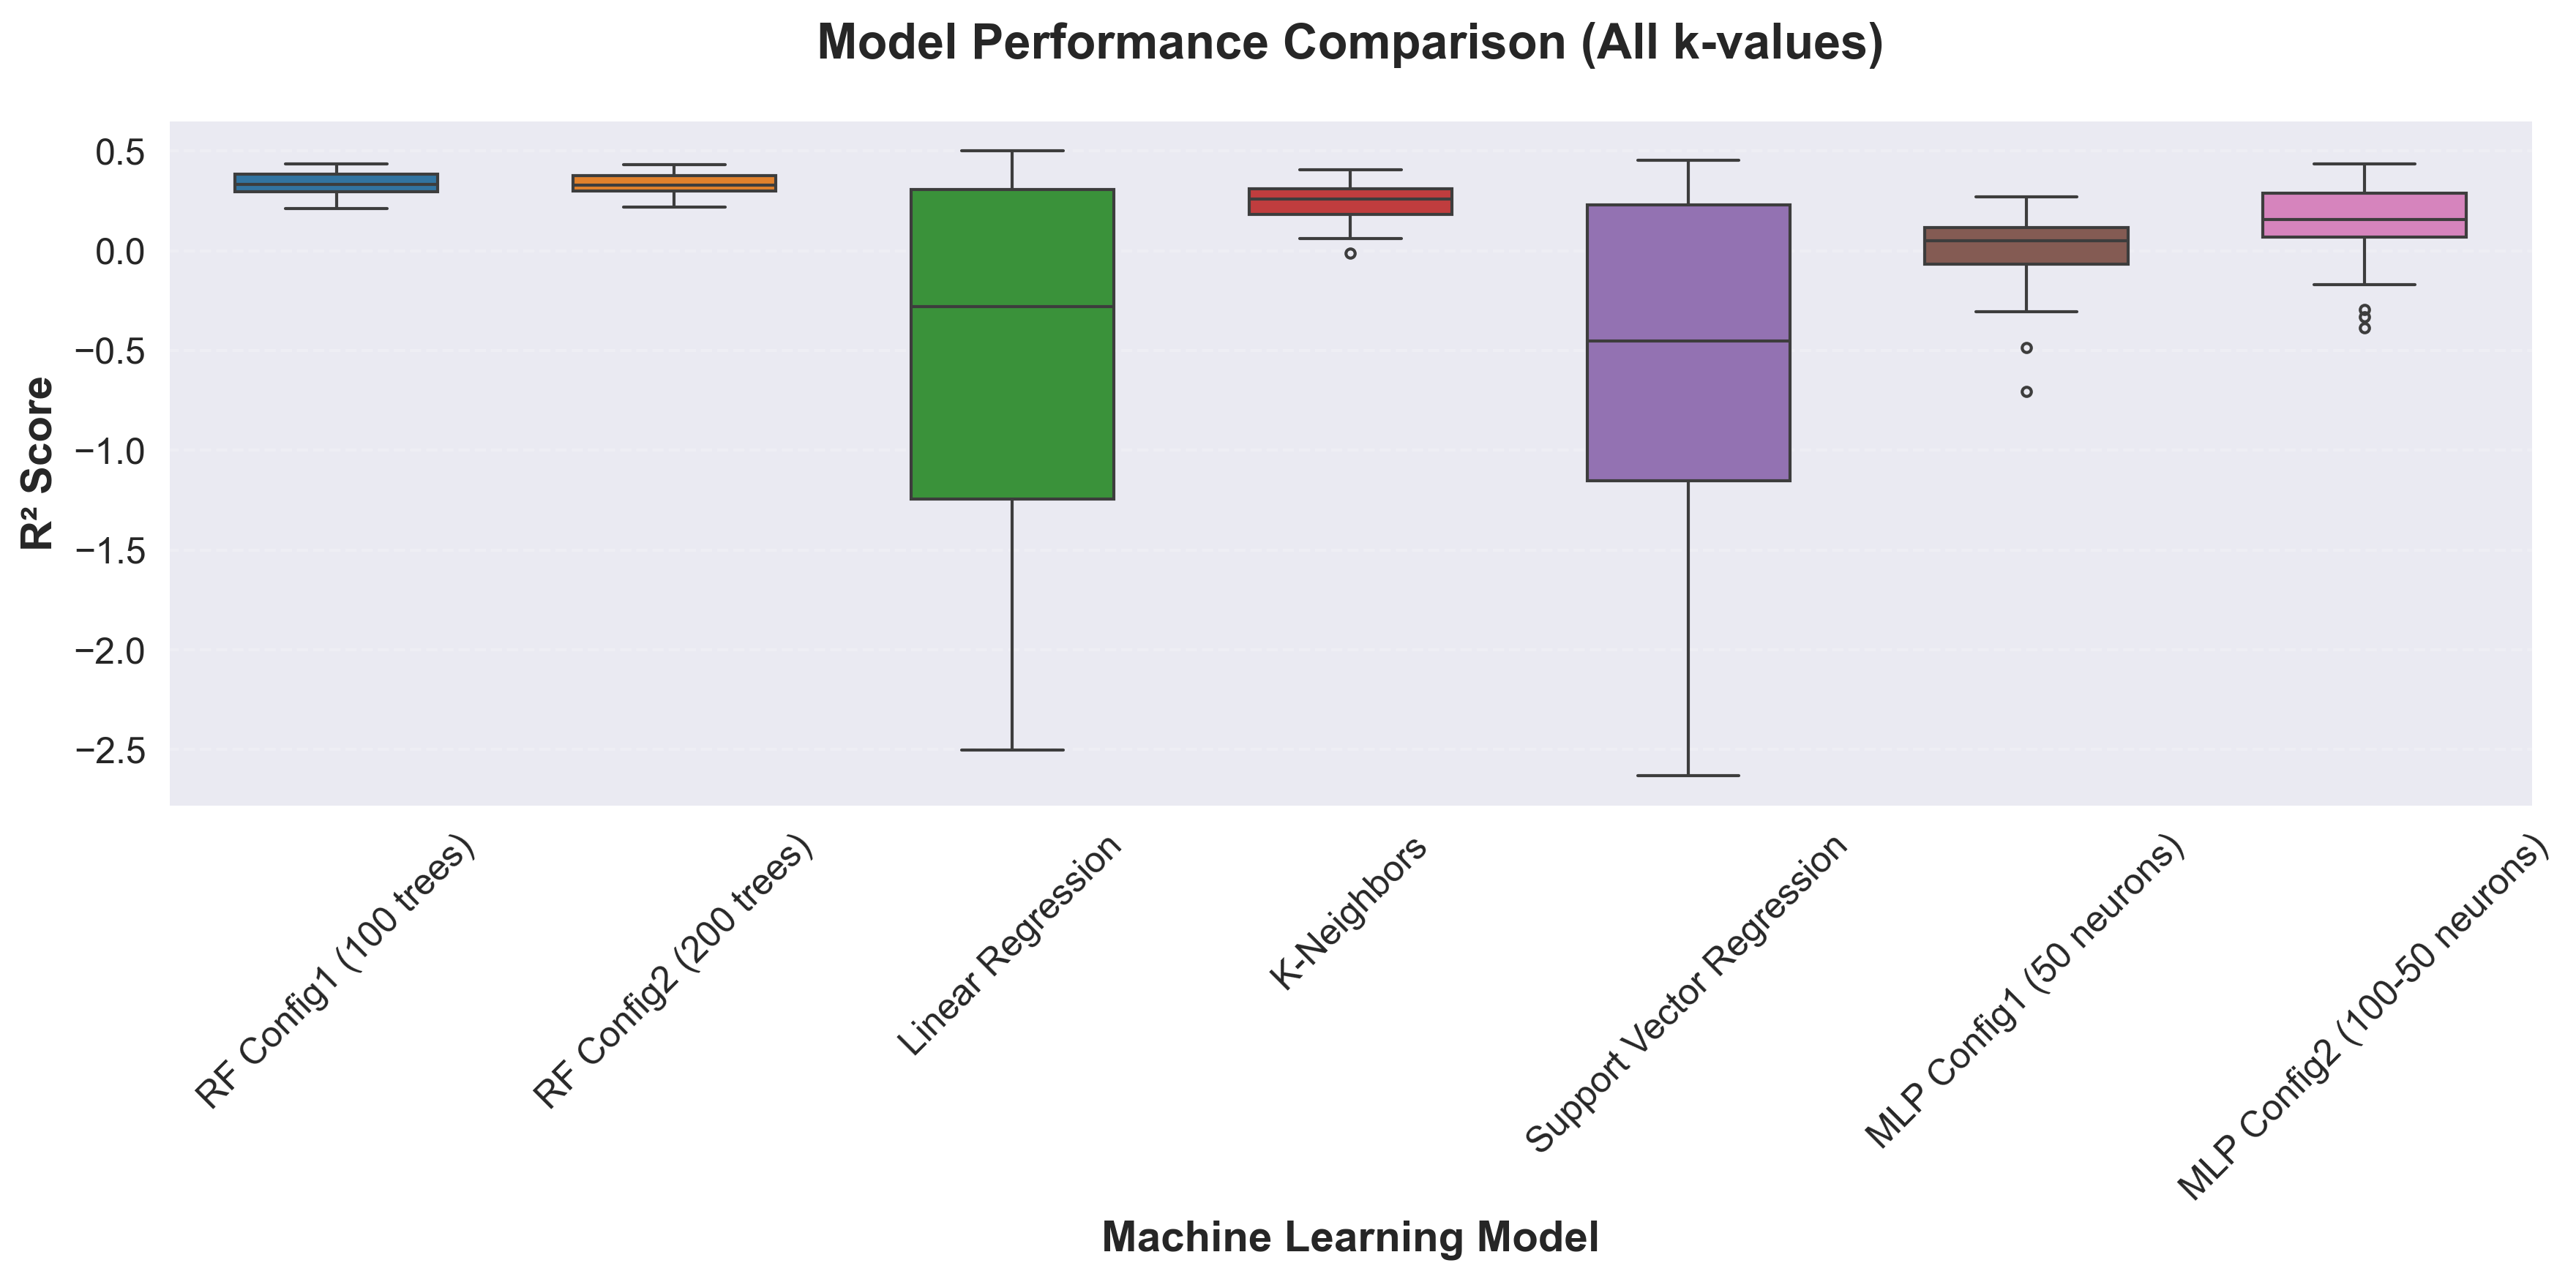

Created model comparison box plot


'Created model comparison box plot'

In [31]:
# Create publication-quality box plot comparing models across all k-values
plt.figure(figsize=(12, 6), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

sns.boxplot(data=df_benchmark, x='model_name', y='model_performance', 
            order=models,
            palette=palette, width=0.6, fliersize=3)
plt.title('Model Performance Comparison (All k-values)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Model', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(len(models)), 
           labels=[model_labels[m] for m in models],
           rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.savefig(f"{file_save_path}model_comparison_boxplot_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created model comparison box plot", print_report_file, level="info")

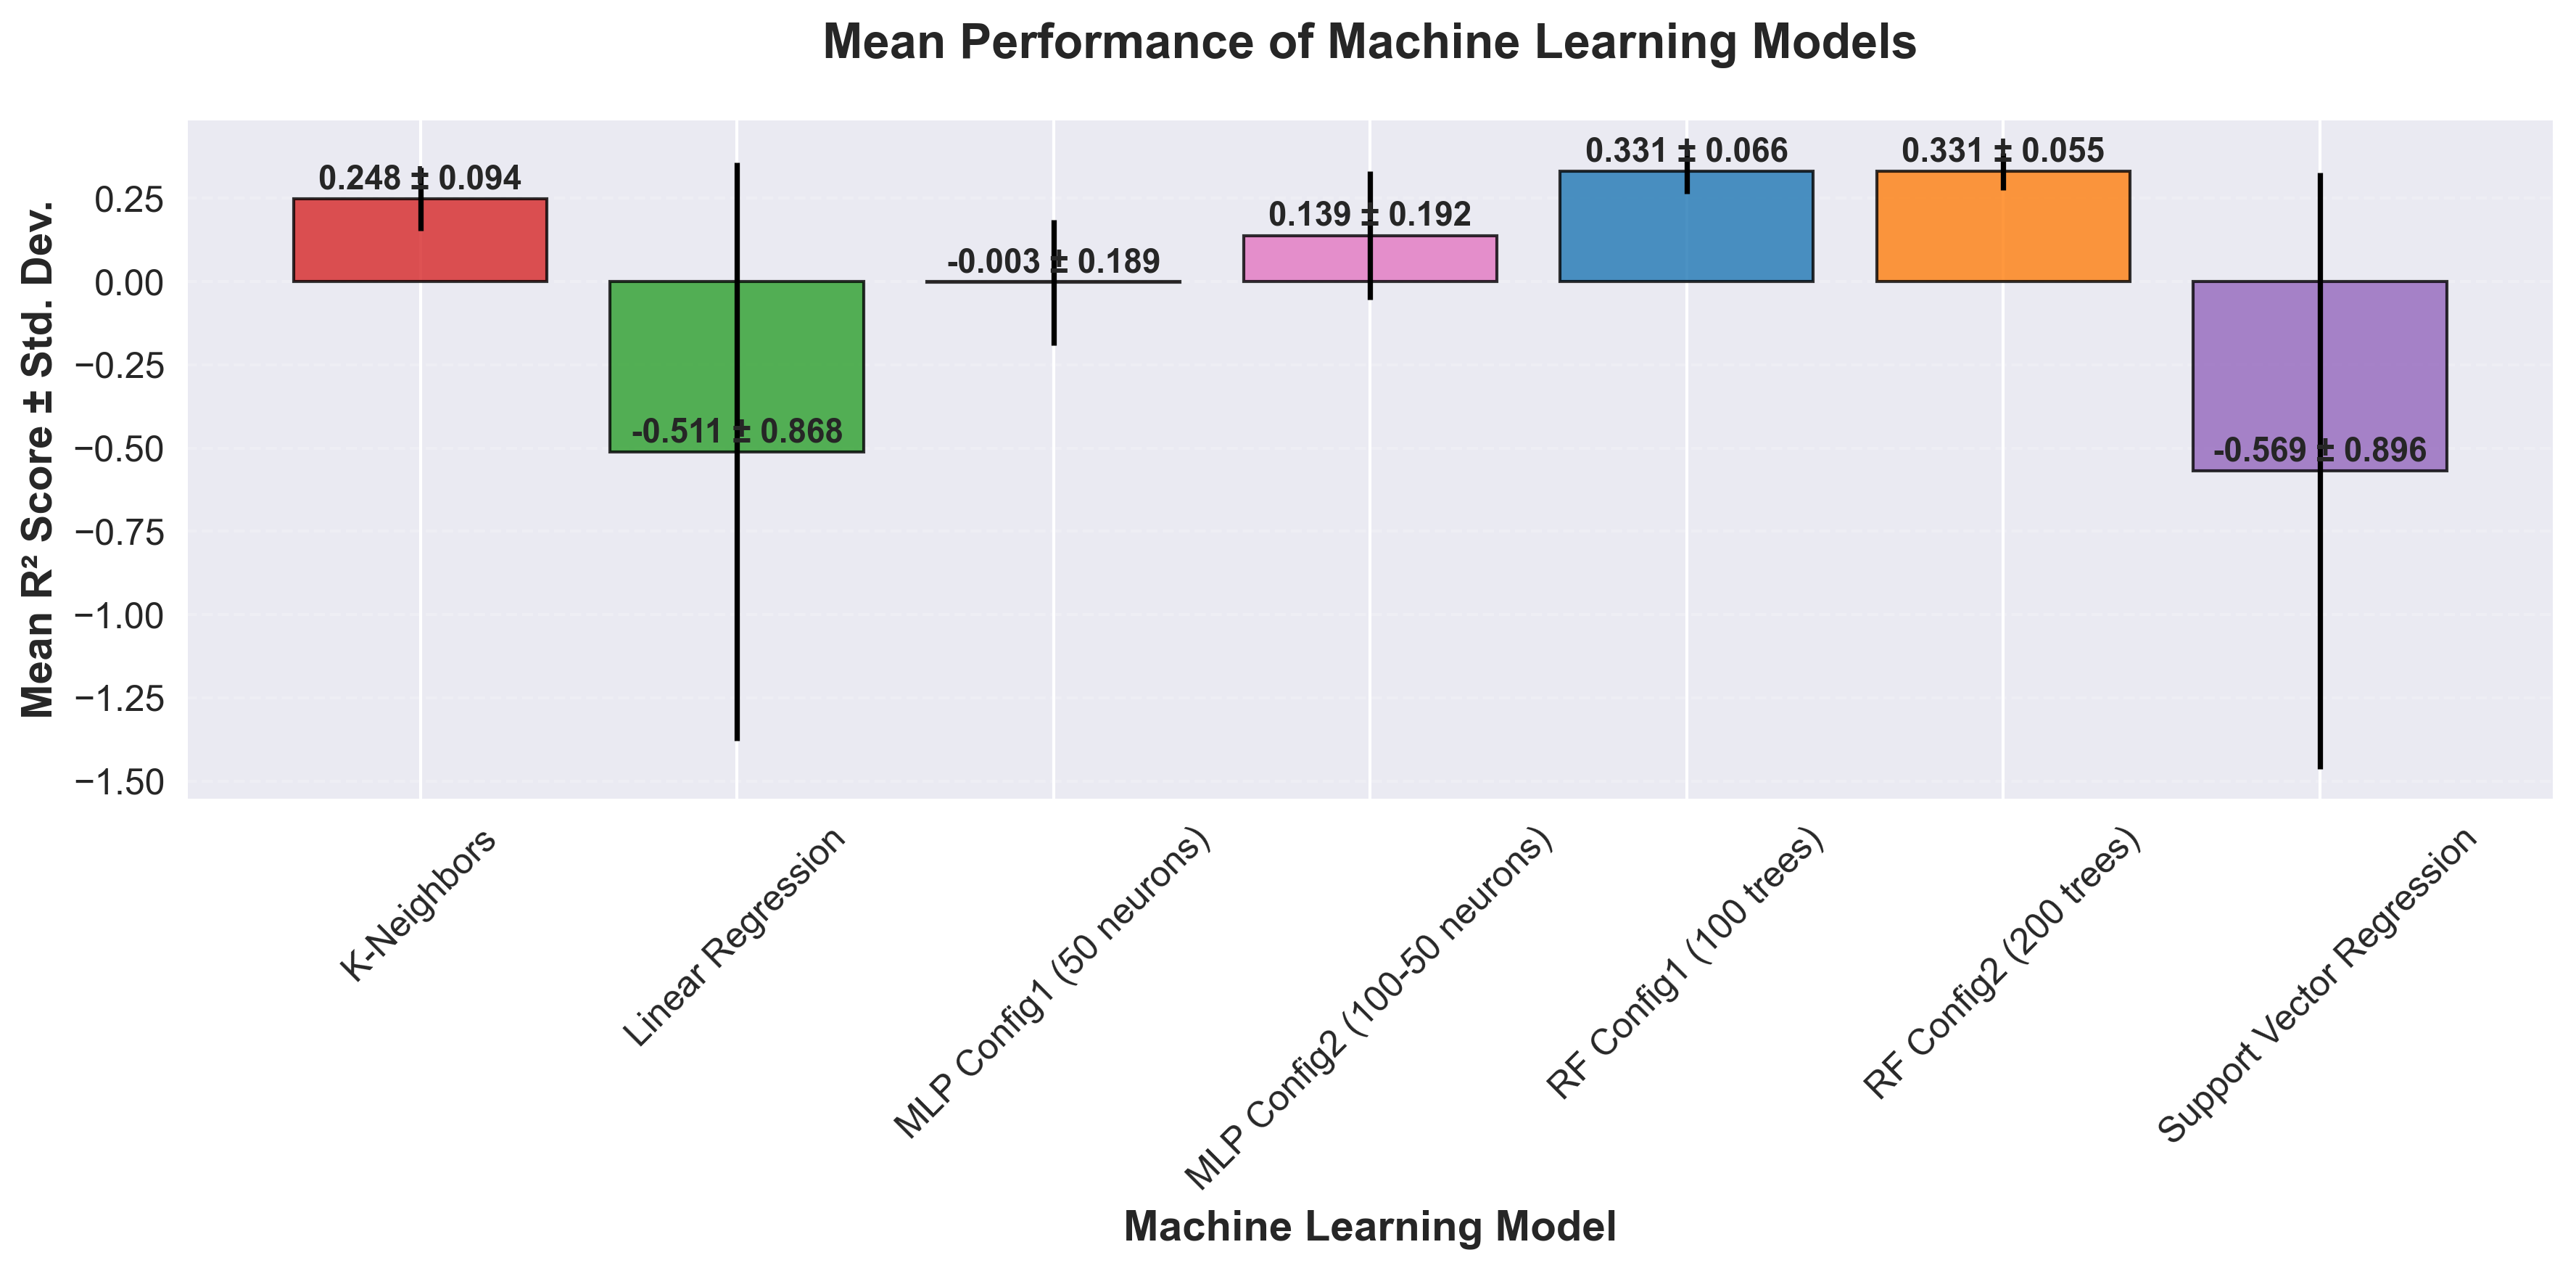

Created model performance bar plot


'Created model performance bar plot'

In [32]:
# Calculate mean and standard deviation for each model
model_stats = df_benchmark.groupby('model_name')['model_performance'].agg(['mean', 'std', 'count']).reset_index()

# Create publication-quality bar plot with error bars
plt.figure(figsize=(12, 6), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Use consistent colors for bar plot
bar_colors = [color_mapping[model] for model in model_stats['model_name']]
bars = plt.bar(range(len(model_stats)), model_stats['mean'], 
               yerr=model_stats['std'], capsize=8, alpha=0.8,
               color=bar_colors, edgecolor='black', linewidth=1)

plt.title('Mean Performance of Machine Learning Models', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Model', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score ± Std. Dev.', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(len(model_stats)), 
           labels=[model_labels.get(m, m) for m in model_stats['model_name']],
           rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on bars with improved formatting
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f} ± {model_stats.iloc[i]["std"]:.3f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.savefig(f"{file_save_path}model_performance_bar_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created model performance bar plot", print_report_file, level="info")

In [33]:
# Create comprehensive statistical summary
summary_table = df_benchmark.groupby('model_name')['model_performance'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('25%', lambda x: x.quantile(0.25)),
    ('median', 'median'),
    ('75%', lambda x: x.quantile(0.75)),
    ('max', 'max')
]).round(4)

save_and_print("Performance Statistics by Model:", print_report_file, level="section")
save_and_print(summary_table.to_string(), print_report_file, level="info")

Performance Statistics by Model:
                               count    mean     std     min     25%  median     75%     max
model_name                                                                                  
KNeighborsRegressor               40  0.2479  0.0941 -0.0137  0.1830  0.2586  0.3105  0.4047
LinearRegression                  40 -0.5113  0.8680 -2.5016 -1.2434 -0.2821  0.3047  0.5004
MLPRegressor_config1              40 -0.0026  0.1887 -0.7073 -0.0689  0.0506  0.1165  0.2704
MLPRegressor_config2              40  0.1385  0.1922 -0.3849  0.0679  0.1576  0.2874  0.4332
RandomForestRegressor_config1     40  0.3312  0.0664  0.2095  0.2948  0.3337  0.3828  0.4332
RandomForestRegressor_config2     40  0.3308  0.0549  0.2196  0.2991  0.3292  0.3741  0.4308
SVR                               40 -0.5687  0.8956 -2.6311 -1.1518 -0.4525  0.2279  0.4533


'                               count    mean     std     min     25%  median     75%     max\nmodel_name                                                                                  \nKNeighborsRegressor               40  0.2479  0.0941 -0.0137  0.1830  0.2586  0.3105  0.4047\nLinearRegression                  40 -0.5113  0.8680 -2.5016 -1.2434 -0.2821  0.3047  0.5004\nMLPRegressor_config1              40 -0.0026  0.1887 -0.7073 -0.0689  0.0506  0.1165  0.2704\nMLPRegressor_config2              40  0.1385  0.1922 -0.3849  0.0679  0.1576  0.2874  0.4332\nRandomForestRegressor_config1     40  0.3312  0.0664  0.2095  0.2948  0.3337  0.3828  0.4332\nRandomForestRegressor_config2     40  0.3308  0.0549  0.2196  0.2991  0.3292  0.3741  0.4308\nSVR                               40 -0.5687  0.8956 -2.6311 -1.1518 -0.4525  0.2279  0.4533'

In [34]:
# IMPROVED: Create enhanced pairwise k-value comparison visualizations
save_and_print("## IMPROVED: Enhanced k-value Comparison Visualizations", print_report_file, level="section")

# Calculate mean performance for each model at each k-value
k_performance_stats = df_benchmark.groupby(['model_name', 'k_value'])['model_performance'].agg(['mean', 'std', 'count']).reset_index()

# Calculate 95% confidence intervals (assuming normal distribution)
k_performance_stats['ci_lower'] = k_performance_stats['mean'] - 1.96 * k_performance_stats['std'] / np.sqrt(k_performance_stats['count'])
k_performance_stats['ci_upper'] = k_performance_stats['mean'] + 1.96 * k_performance_stats['std'] / np.sqrt(k_performance_stats['count'])

# Separate models by performance (positive vs negative R²)
positive_models = []
negative_models = []
for model in models:
    model_mean = df_benchmark[df_benchmark['model_name'] == model]['model_performance'].mean()
    if model_mean >= 0:
        positive_models.append(model)
    else:
        negative_models.append(model)

save_and_print(f"Models with positive R²: {[model_labels[m] for m in positive_models]}", print_report_file, level="info")
save_and_print(f"Models with negative R²: {[model_labels[m] for m in negative_models]}", print_report_file, level="info")

## IMPROVED: Enhanced k-value Comparison Visualizations
Models with positive R²: ['RF Config1 (100 trees)', 'RF Config2 (200 trees)', 'K-Neighbors', 'MLP Config2 (100-50 neurons)']
Models with negative R²: ['Linear Regression', 'Support Vector Regression', 'MLP Config1 (50 neurons)']


"Models with negative R²: ['Linear Regression', 'Support Vector Regression', 'MLP Config1 (50 neurons)']"

### IMPROVED VERSION 1: ΔR² Difference Plot


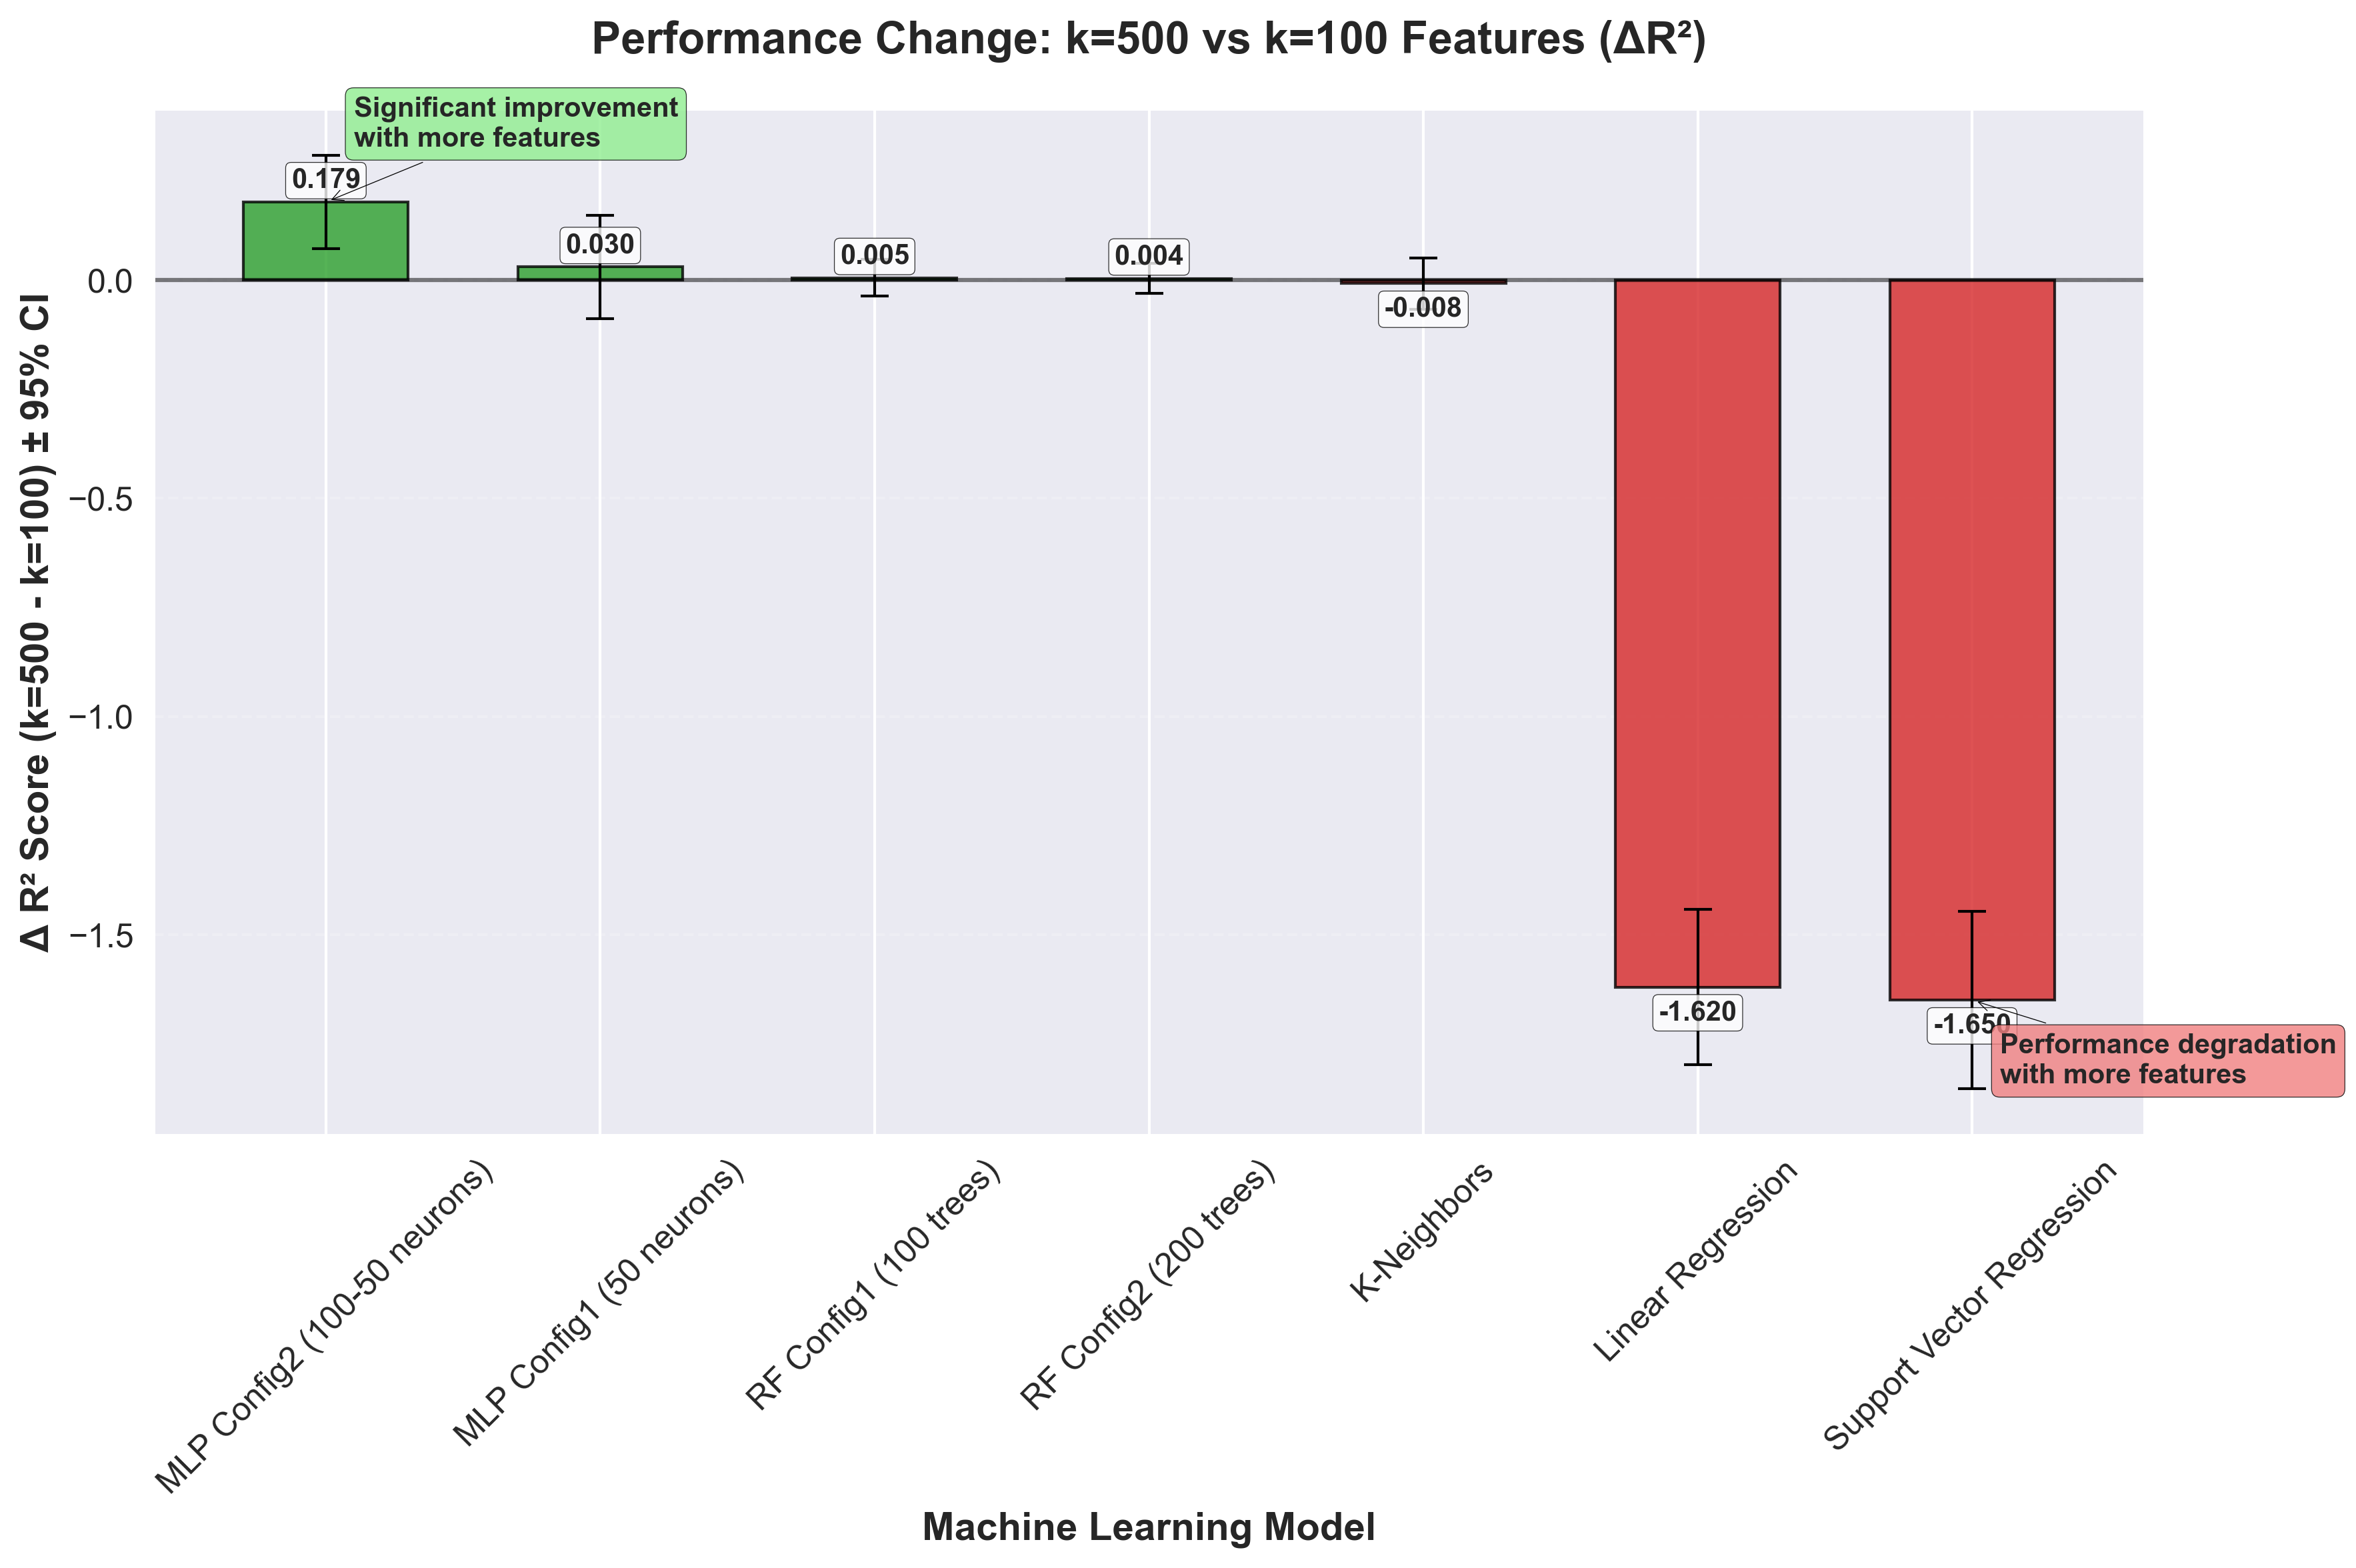

Created improved ΔR² difference plot


'Created improved ΔR² difference plot'

In [35]:
# IMPROVED VERSION 1: ΔR² Difference Plot (Focus on the key comparison)
save_and_print("### IMPROVED VERSION 1: ΔR² Difference Plot", print_report_file, level="subsection")

# Calculate ΔR² (k=500 - k=100) for each model
delta_r2_data = []
for model in models:
    k100_data = df_benchmark[(df_benchmark['model_name'] == model) & (df_benchmark['k_value'] == 100)]
    k500_data = df_benchmark[(df_benchmark['model_name'] == model) & (df_benchmark['k_value'] == 500)]
    
    if len(k100_data) > 0 and len(k500_data) > 0:
        k100_mean = k100_data['model_performance'].mean()
        k500_mean = k500_data['model_performance'].mean()
        delta_r2 = k500_mean - k100_mean
        
        # Calculate standard error for the difference
        k100_std = k100_data['model_performance'].std()
        k500_std = k500_data['model_performance'].std()
        k100_n = len(k100_data)
        k500_n = len(k500_data)
        
        se_delta = np.sqrt((k100_std**2 / k100_n) + (k500_std**2 / k500_n))
        ci_lower = delta_r2 - 1.96 * se_delta
        ci_upper = delta_r2 + 1.96 * se_delta
        
        delta_r2_data.append({
            'model': model,
            'model_label': model_labels[model],
            'delta_r2': delta_r2,
            'se_delta': se_delta,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'k100_mean': k100_mean,
            'k500_mean': k500_mean
        })

# Sort by ΔR² for better visualization
delta_r2_data.sort(key=lambda x: x['delta_r2'], reverse=True)

# Create ΔR² plot
plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Plot ΔR² bars with confidence intervals
x_pos = np.arange(len(delta_r2_data))
deltas = [item['delta_r2'] for item in delta_r2_data]
ci_lowers = [item['ci_lower'] for item in delta_r2_data]
ci_uppers = [item['ci_upper'] for item in delta_r2_data]
model_labels_delta = [item['model_label'] for item in delta_r2_data]

# Use color coding for positive/negative differences
bar_colors = ['#2ca02c' if delta > 0 else '#d62728' for delta in deltas]

bars = plt.bar(x_pos, deltas, color=bar_colors, alpha=0.8, 
               edgecolor='black', linewidth=1, width=0.6)

# Add confidence intervals as error bars
plt.errorbar(x_pos, deltas, yerr=[deltas[i] - ci_lowers[i] for i in range(len(deltas))], 
             fmt='none', ecolor='black', elinewidth=1, capsize=5, capthick=1)

plt.title('Performance Change: k=500 vs k=100 Features (ΔR²)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Model', fontsize=14, fontweight='bold')
plt.ylabel('Δ R² Score (k=500 - k=100) ± 95% CI', fontsize=14, fontweight='bold')
plt.xticks(x_pos, model_labels_delta, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)

# Add value labels with improved placement
for i, bar in enumerate(bars):
    height = bar.get_height()
    label_y = height + (0.02 if height > 0 else -0.03)
    va = 'bottom' if height > 0 else 'top'
    plt.text(bar.get_x() + bar.get_width()/2., label_y,
             f'{height:.3f}', ha='center', va=va, 
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

# Add annotations for key insights
if len(delta_r2_data) > 0:
    max_delta = max(deltas)
    min_delta = min(deltas)
    
    if max_delta > 0.1:
        plt.annotate('Significant improvement\nwith more features', 
                    xy=(deltas.index(max_delta), max_delta), 
                    xytext=(10, 20), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    if min_delta < -0.1:
        plt.annotate('Performance degradation\nwith more features', 
                    xy=(deltas.index(min_delta), min_delta), 
                    xytext=(10, -30), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig(f"{file_save_path}improved_delta_r2_comparison_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created improved ΔR² difference plot", print_report_file, level="info")

### IMPROVED VERSION 2: Two-Subplot Approach


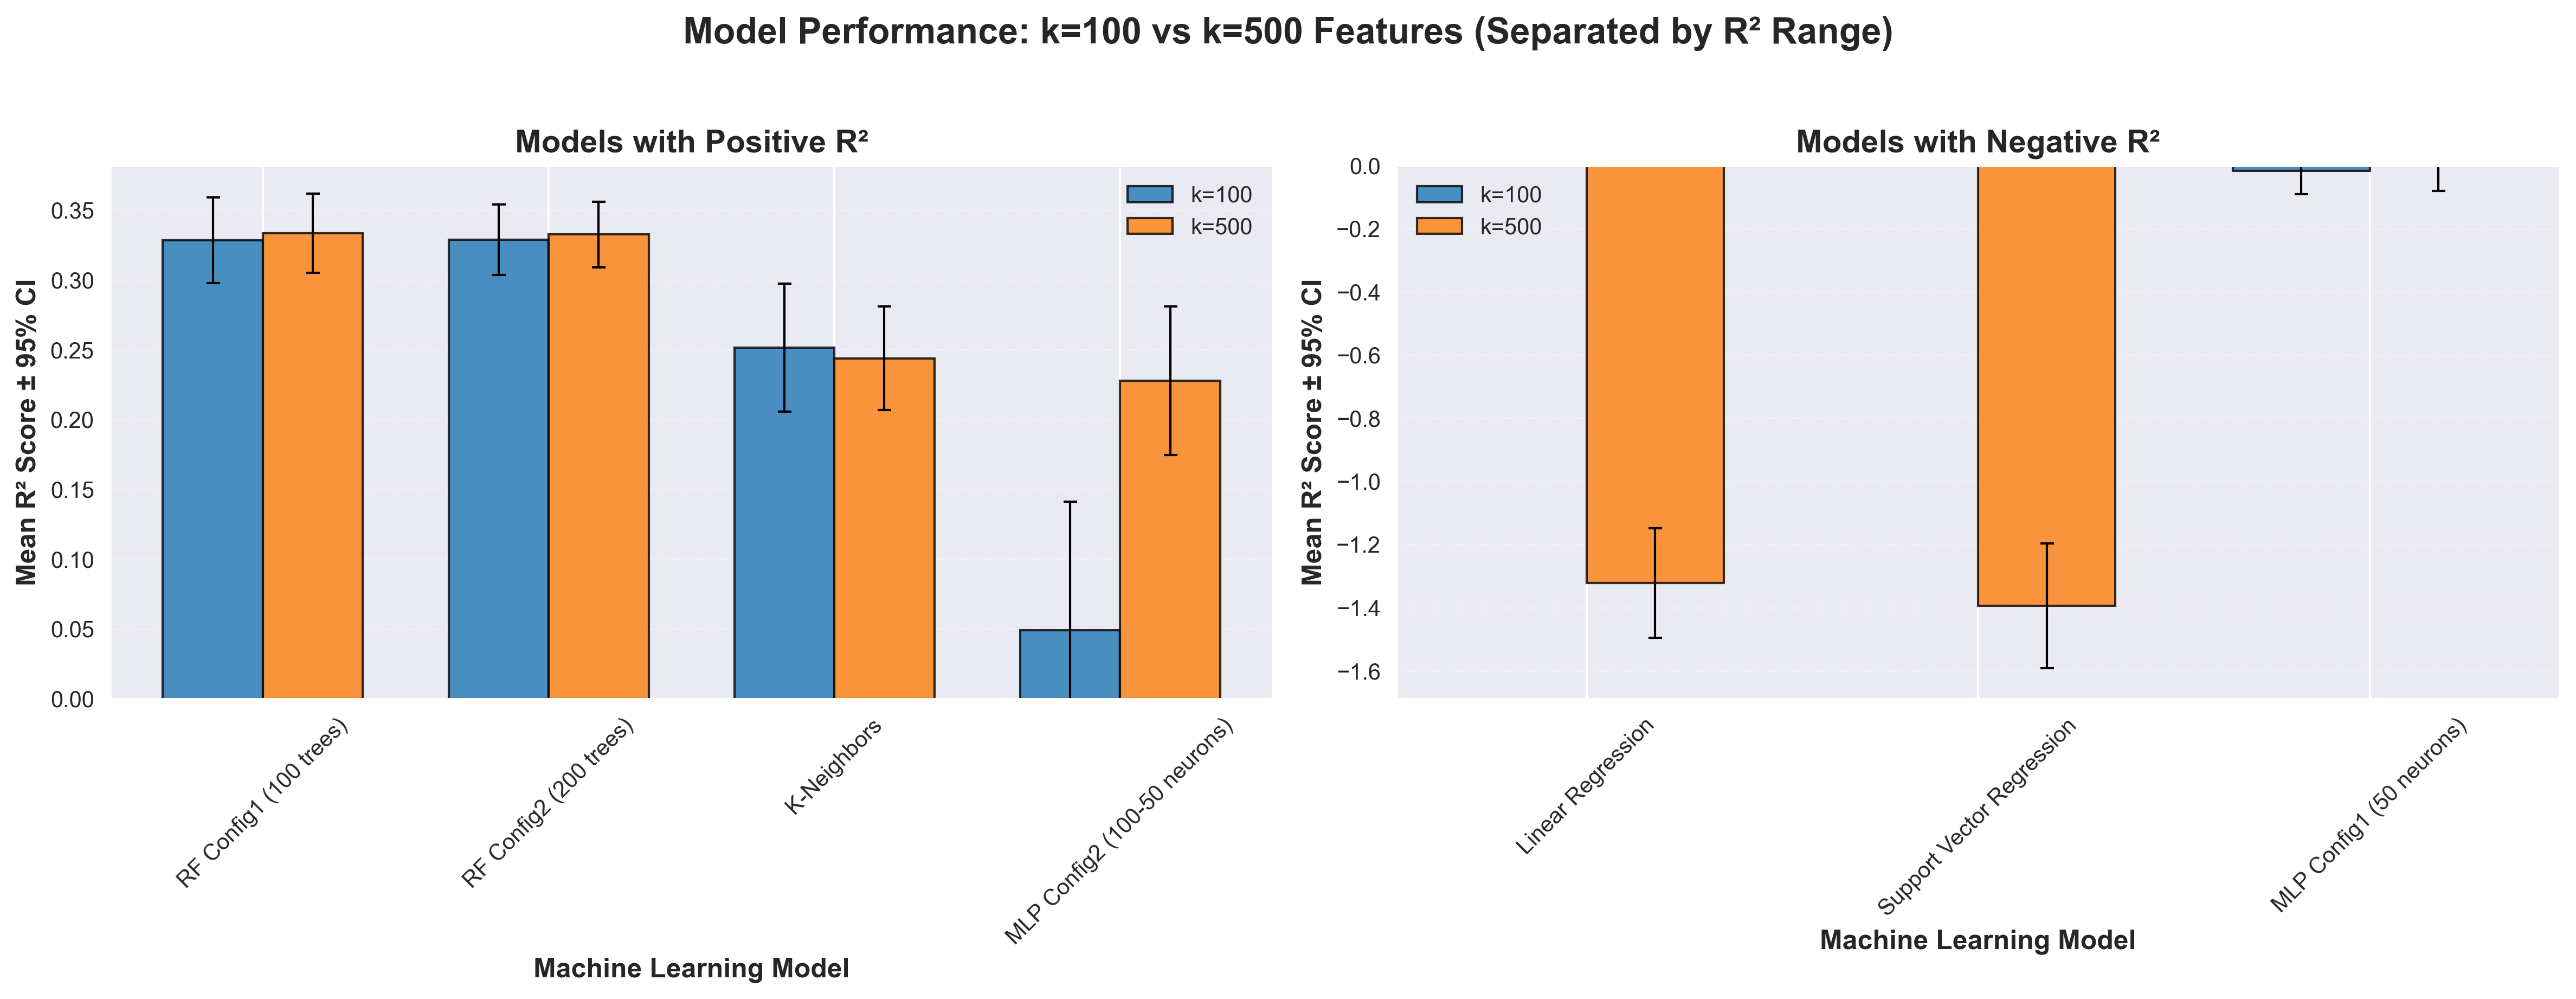

Created improved two-subplot comparison


'Created improved two-subplot comparison'

In [36]:
# IMPROVED VERSION 2: Two-Subplot Approach for Positive/Negative Models
save_and_print("### IMPROVED VERSION 2: Two-Subplot Approach", print_report_file, level="subsection")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=300)
fig.suptitle('Model Performance: k=100 vs k=500 Features (Separated by R² Range)', 
             fontsize=16, fontweight='bold', y=1.02)

# Subplot 1: Models with positive R²
if len(positive_models) > 0:
    # Prepare data for positive models
    pos_k_data = k_performance_stats[k_performance_stats['model_name'].isin(positive_models)]
    
    # Use simplified color scheme: blue for k=100, orange for k=500
    bar_width = 0.35
    x_pos = np.arange(len(positive_models))
    
    for i, k_value in enumerate(k_values):
        k_subset = pos_k_data[pos_k_data['k_value'] == k_value]
        
        k_means = []
        k_cis = []
        for model in positive_models:
            model_data = k_subset[k_subset['model_name'] == model]
            if len(model_data) > 0:
                k_means.append(model_data['mean'].iloc[0])
                k_cis.append((model_data['mean'].iloc[0] - model_data['ci_lower'].iloc[0], 
                             model_data['ci_upper'].iloc[0] - model_data['mean'].iloc[0]))
            else:
                k_means.append(0)
                k_cis.append((0, 0))
        
        color = '#1f77b4' if k_value == 100 else '#ff7f0e'
        bars = ax1.bar(x_pos + i * bar_width, k_means, bar_width,
                      color=color, alpha=0.8, edgecolor='black', linewidth=1,
                      label=f'k={k_value}')
        
        # Add error bars (95% CI)
        ax1.errorbar(x_pos + i * bar_width, k_means, 
                    yerr=np.array(k_cis).T, fmt='none', ecolor='black', 
                    elinewidth=1, capsize=3, capthick=1)
    
    ax1.set_title('Models with Positive R²', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Machine Learning Model', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Mean R² Score ± 95% CI', fontsize=12, fontweight='bold')
    ax1.set_xticks(x_pos + bar_width/2)
    ax1.set_xticklabels([model_labels[m] for m in positive_models], rotation=45, fontsize=10)
    ax1.legend(fontsize=10, framealpha=0.9)
    ax1.grid(axis='y', alpha=0.2, linestyle='--')
    ax1.set_ylim(bottom=0)  # Focus on positive range

# Subplot 2: Models with negative R²
if len(negative_models) > 0:
    # Prepare data for negative models
    neg_k_data = k_performance_stats[k_performance_stats['model_name'].isin(negative_models)]
    
    bar_width = 0.35
    x_pos = np.arange(len(negative_models))
    
    for i, k_value in enumerate(k_values):
        k_subset = neg_k_data[neg_k_data['k_value'] == k_value]
        
        k_means = []
        k_cis = []
        for model in negative_models:
            model_data = k_subset[k_subset['model_name'] == model]
            if len(model_data) > 0:
                k_means.append(model_data['mean'].iloc[0])
                k_cis.append((model_data['mean'].iloc[0] - model_data['ci_lower'].iloc[0], 
                             model_data['ci_upper'].iloc[0] - model_data['mean'].iloc[0]))
            else:
                k_means.append(0)
                k_cis.append((0, 0))
        
        color = '#1f77b4' if k_value == 100 else '#ff7f0e'
        bars = ax2.bar(x_pos + i * bar_width, k_means, bar_width,
                      color=color, alpha=0.8, edgecolor='black', linewidth=1,
                      label=f'k={k_value}')
        
        # Add error bars (95% CI)
        ax2.errorbar(x_pos + i * bar_width, k_means, 
                    yerr=np.array(k_cis).T, fmt='none', ecolor='black', 
                    elinewidth=1, capsize=3, capthick=1)
    
    ax2.set_title('Models with Negative R²', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Machine Learning Model', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Mean R² Score ± 95% CI', fontsize=12, fontweight='bold')
    ax2.set_xticks(x_pos + bar_width/2)
    ax2.set_xticklabels([model_labels[m] for m in negative_models], rotation=45, fontsize=10)
    ax2.legend(fontsize=10, framealpha=0.9)
    ax2.grid(axis='y', alpha=0.2, linestyle='--')
    ax2.set_ylim(top=0)  # Focus on negative range

plt.tight_layout()
plt.savefig(f"{file_save_path}improved_two_subplot_comparison_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created improved two-subplot comparison", print_report_file, level="info")

### IMPROVED VERSION 3: Enhanced Grouped Bar Chart


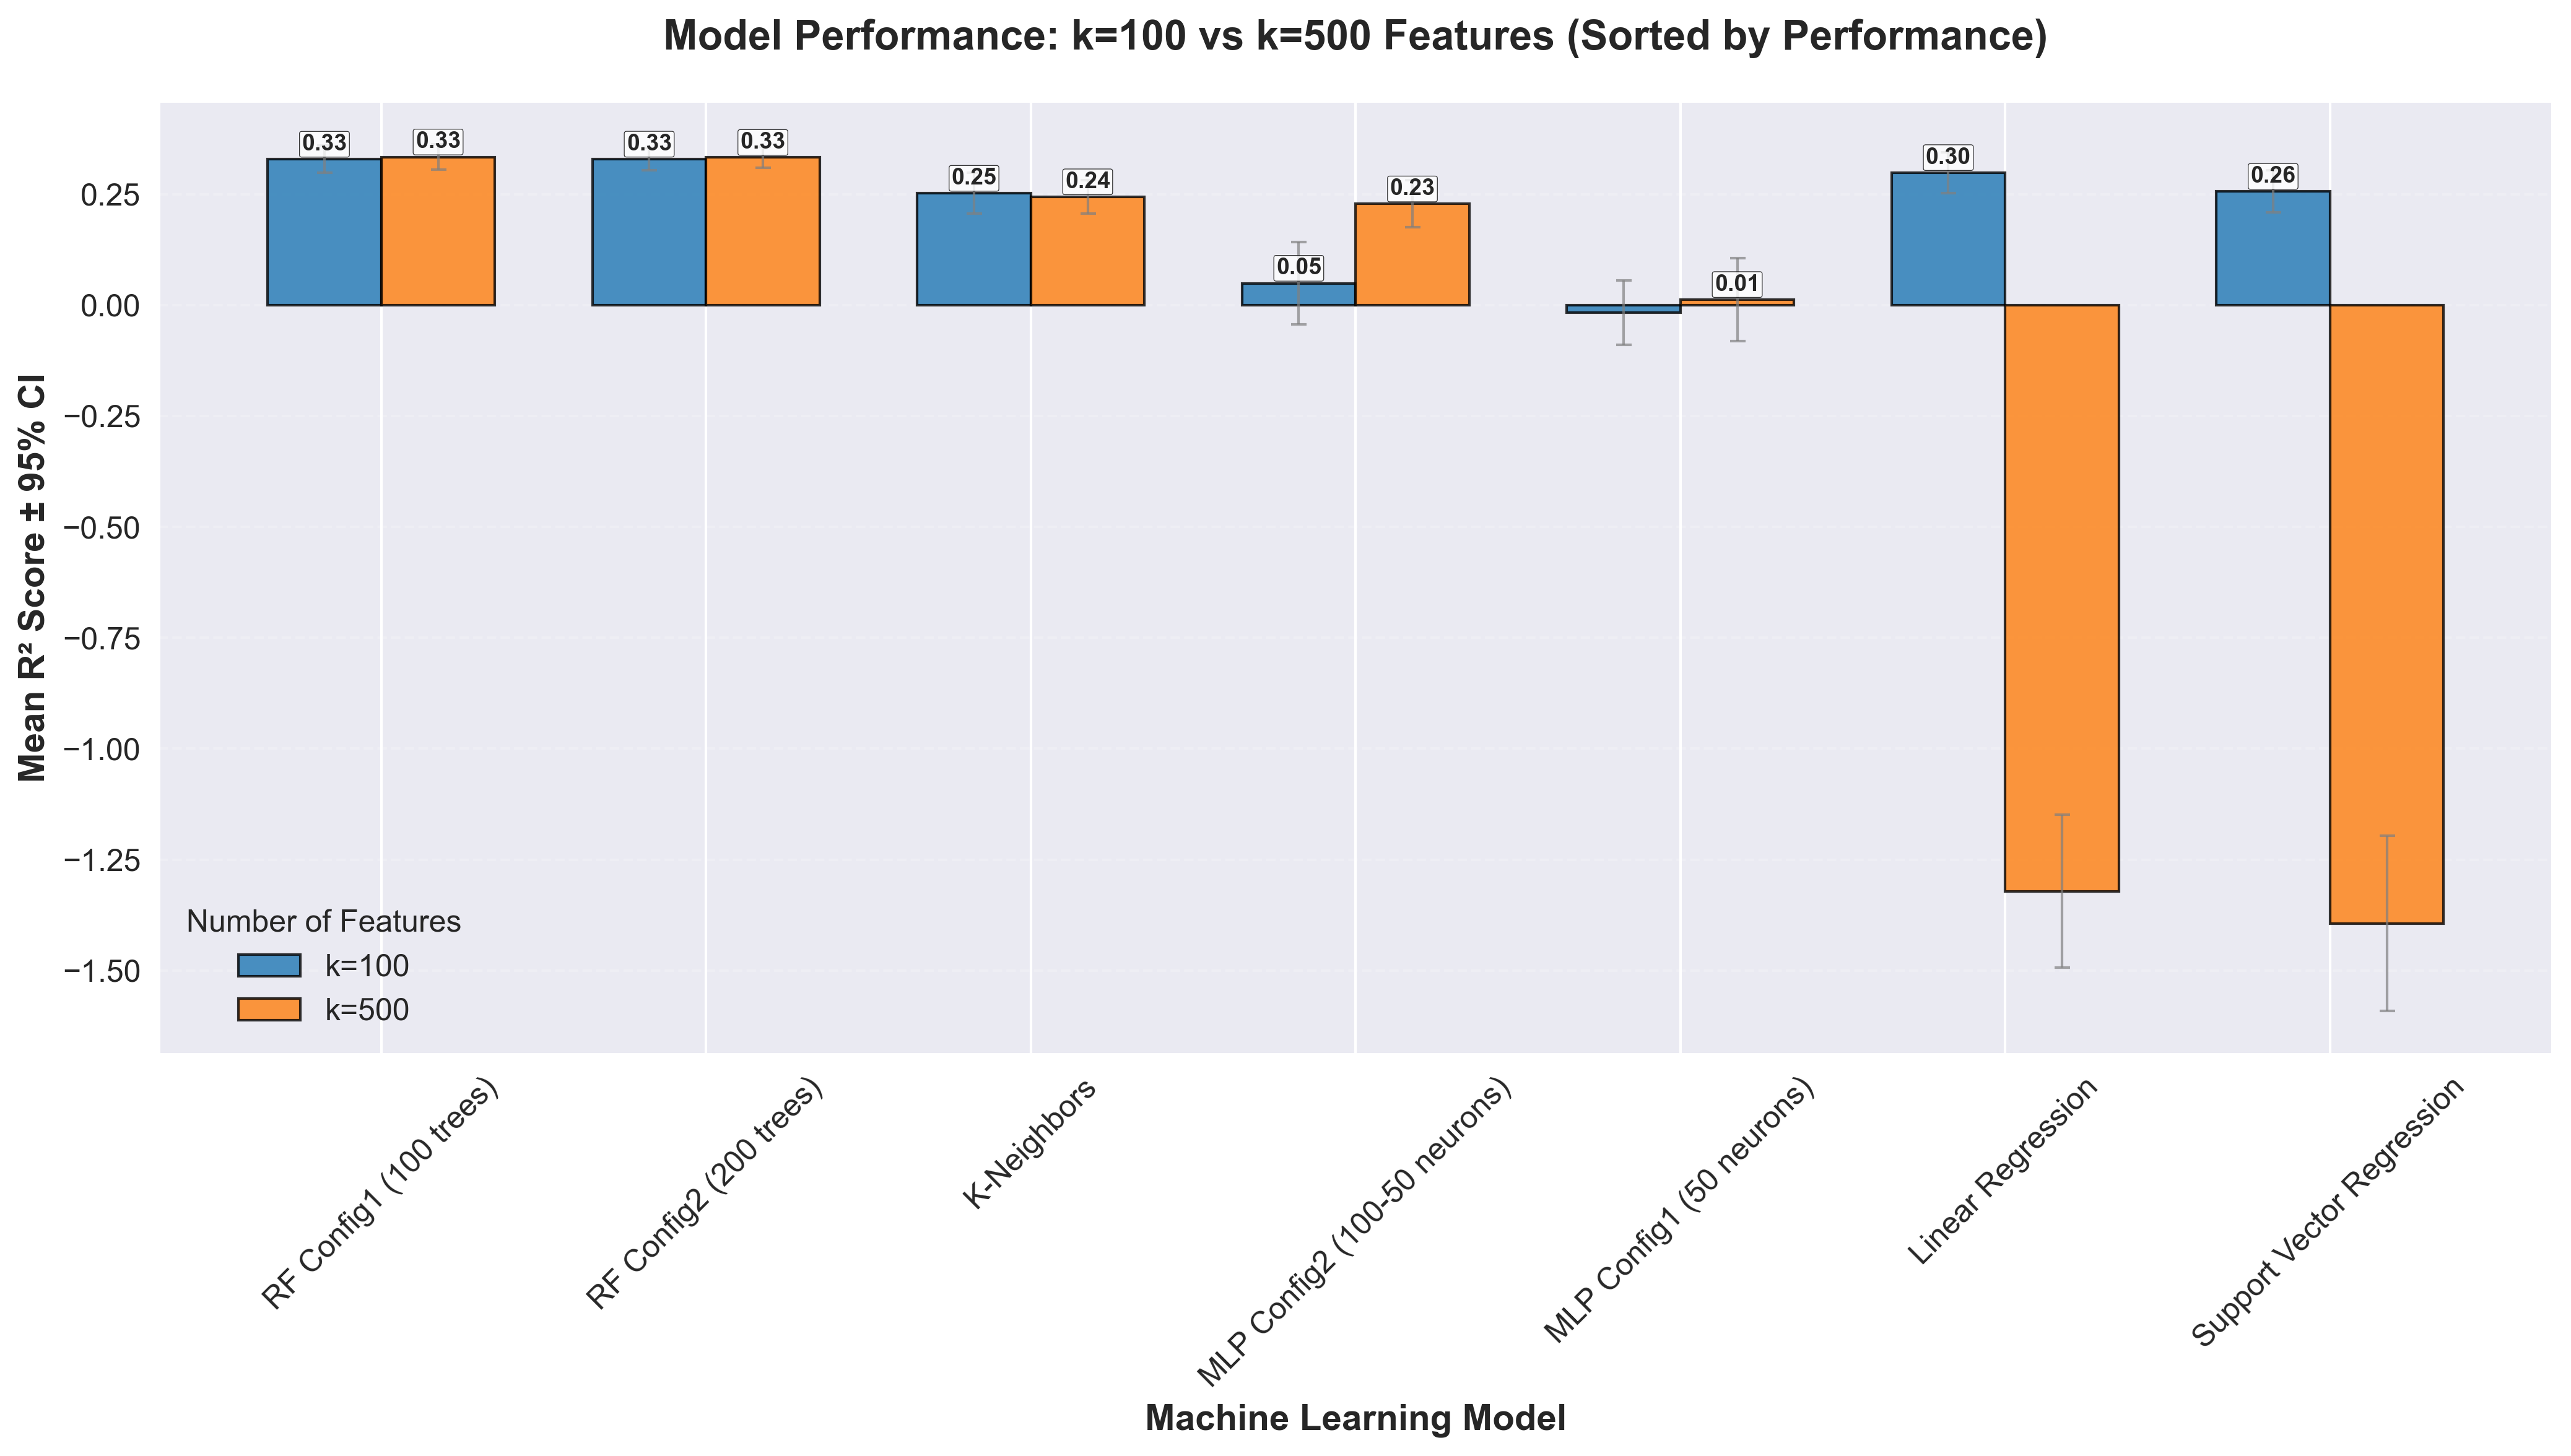

Created improved grouped bar chart with simplified color scheme


'Created improved grouped bar chart with simplified color scheme'

In [37]:
# IMPROVED VERSION 3: Enhanced Grouped Bar Chart with Simplified Color Scheme
save_and_print("### IMPROVED VERSION 3: Enhanced Grouped Bar Chart", print_report_file, level="subsection")

# Sort models by mean performance for better comparison
model_means = df_benchmark.groupby('model_name')['model_performance'].mean().sort_values(ascending=False)
sorted_models = model_means.index.tolist()

plt.figure(figsize=(14, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Use simplified color scheme: consistent across all models
bar_width = 0.35
x_pos = np.arange(len(sorted_models))

# Create bars for k=100 and k=500 with consistent colors
for i, k_value in enumerate(k_values):
    k_data = k_performance_stats[k_performance_stats['k_value'] == k_value]
    
    # Ensure the data is in the same order as sorted_models
    k_means = []
    k_cis = []
    for model in sorted_models:
        model_k_data = k_data[k_data['model_name'] == model]
        if len(model_k_data) > 0:
            k_means.append(model_k_data['mean'].iloc[0])
            k_cis.append((model_k_data['mean'].iloc[0] - model_k_data['ci_lower'].iloc[0], 
                         model_k_data['ci_upper'].iloc[0] - model_k_data['mean'].iloc[0]))
        else:
            k_means.append(0)
            k_cis.append((0, 0))
    
    # Use consistent colors: blue for k=100, orange for k=500
    color = '#1f77b4' if k_value == 100 else '#ff7f0e'
    bars = plt.bar(x_pos + i * bar_width, k_means, bar_width,
                   color=color, alpha=0.8, edgecolor='black', linewidth=1,
                   label=f'k={k_value}')
    
    # Add 95% confidence intervals with subtle styling
    plt.errorbar(x_pos + i * bar_width, k_means, 
                 yerr=np.array(k_cis).T, fmt='none', ecolor='gray', 
                 elinewidth=1, capsize=3, capthick=1, alpha=0.7)

plt.title('Model Performance: k=100 vs k=500 Features (Sorted by Performance)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Model', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score ± 95% CI', fontsize=14, fontweight='bold')
plt.xticks(x_pos + bar_width/2, [model_labels[m] for m in sorted_models], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Number of Features', fontsize=12, framealpha=0.9)
plt.grid(axis='y', alpha=0.2, linestyle='--')

# Add value labels with improved placement (only for positive values)
for i, model in enumerate(sorted_models):
    for j, k_value in enumerate(k_values):
        k_data = k_performance_stats[k_performance_stats['k_value'] == k_value]
        model_k_data = k_data[k_data['model_name'] == model]
        if len(model_k_data) > 0:
            height = model_k_data['mean'].iloc[0]
            if height >= 0:  # Only label positive values to reduce clutter
                plt.text(x_pos[i] + j * bar_width, height + 0.01,
                         f'{height:.2f}', ha='center', va='bottom', 
                         fontsize=9, fontweight='bold',
                         bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig(f"{file_save_path}improved_grouped_bar_chart_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created improved grouped bar chart with simplified color scheme", print_report_file, level="info")

### IMPROVED VERSION 4: Small Multiples Analysis


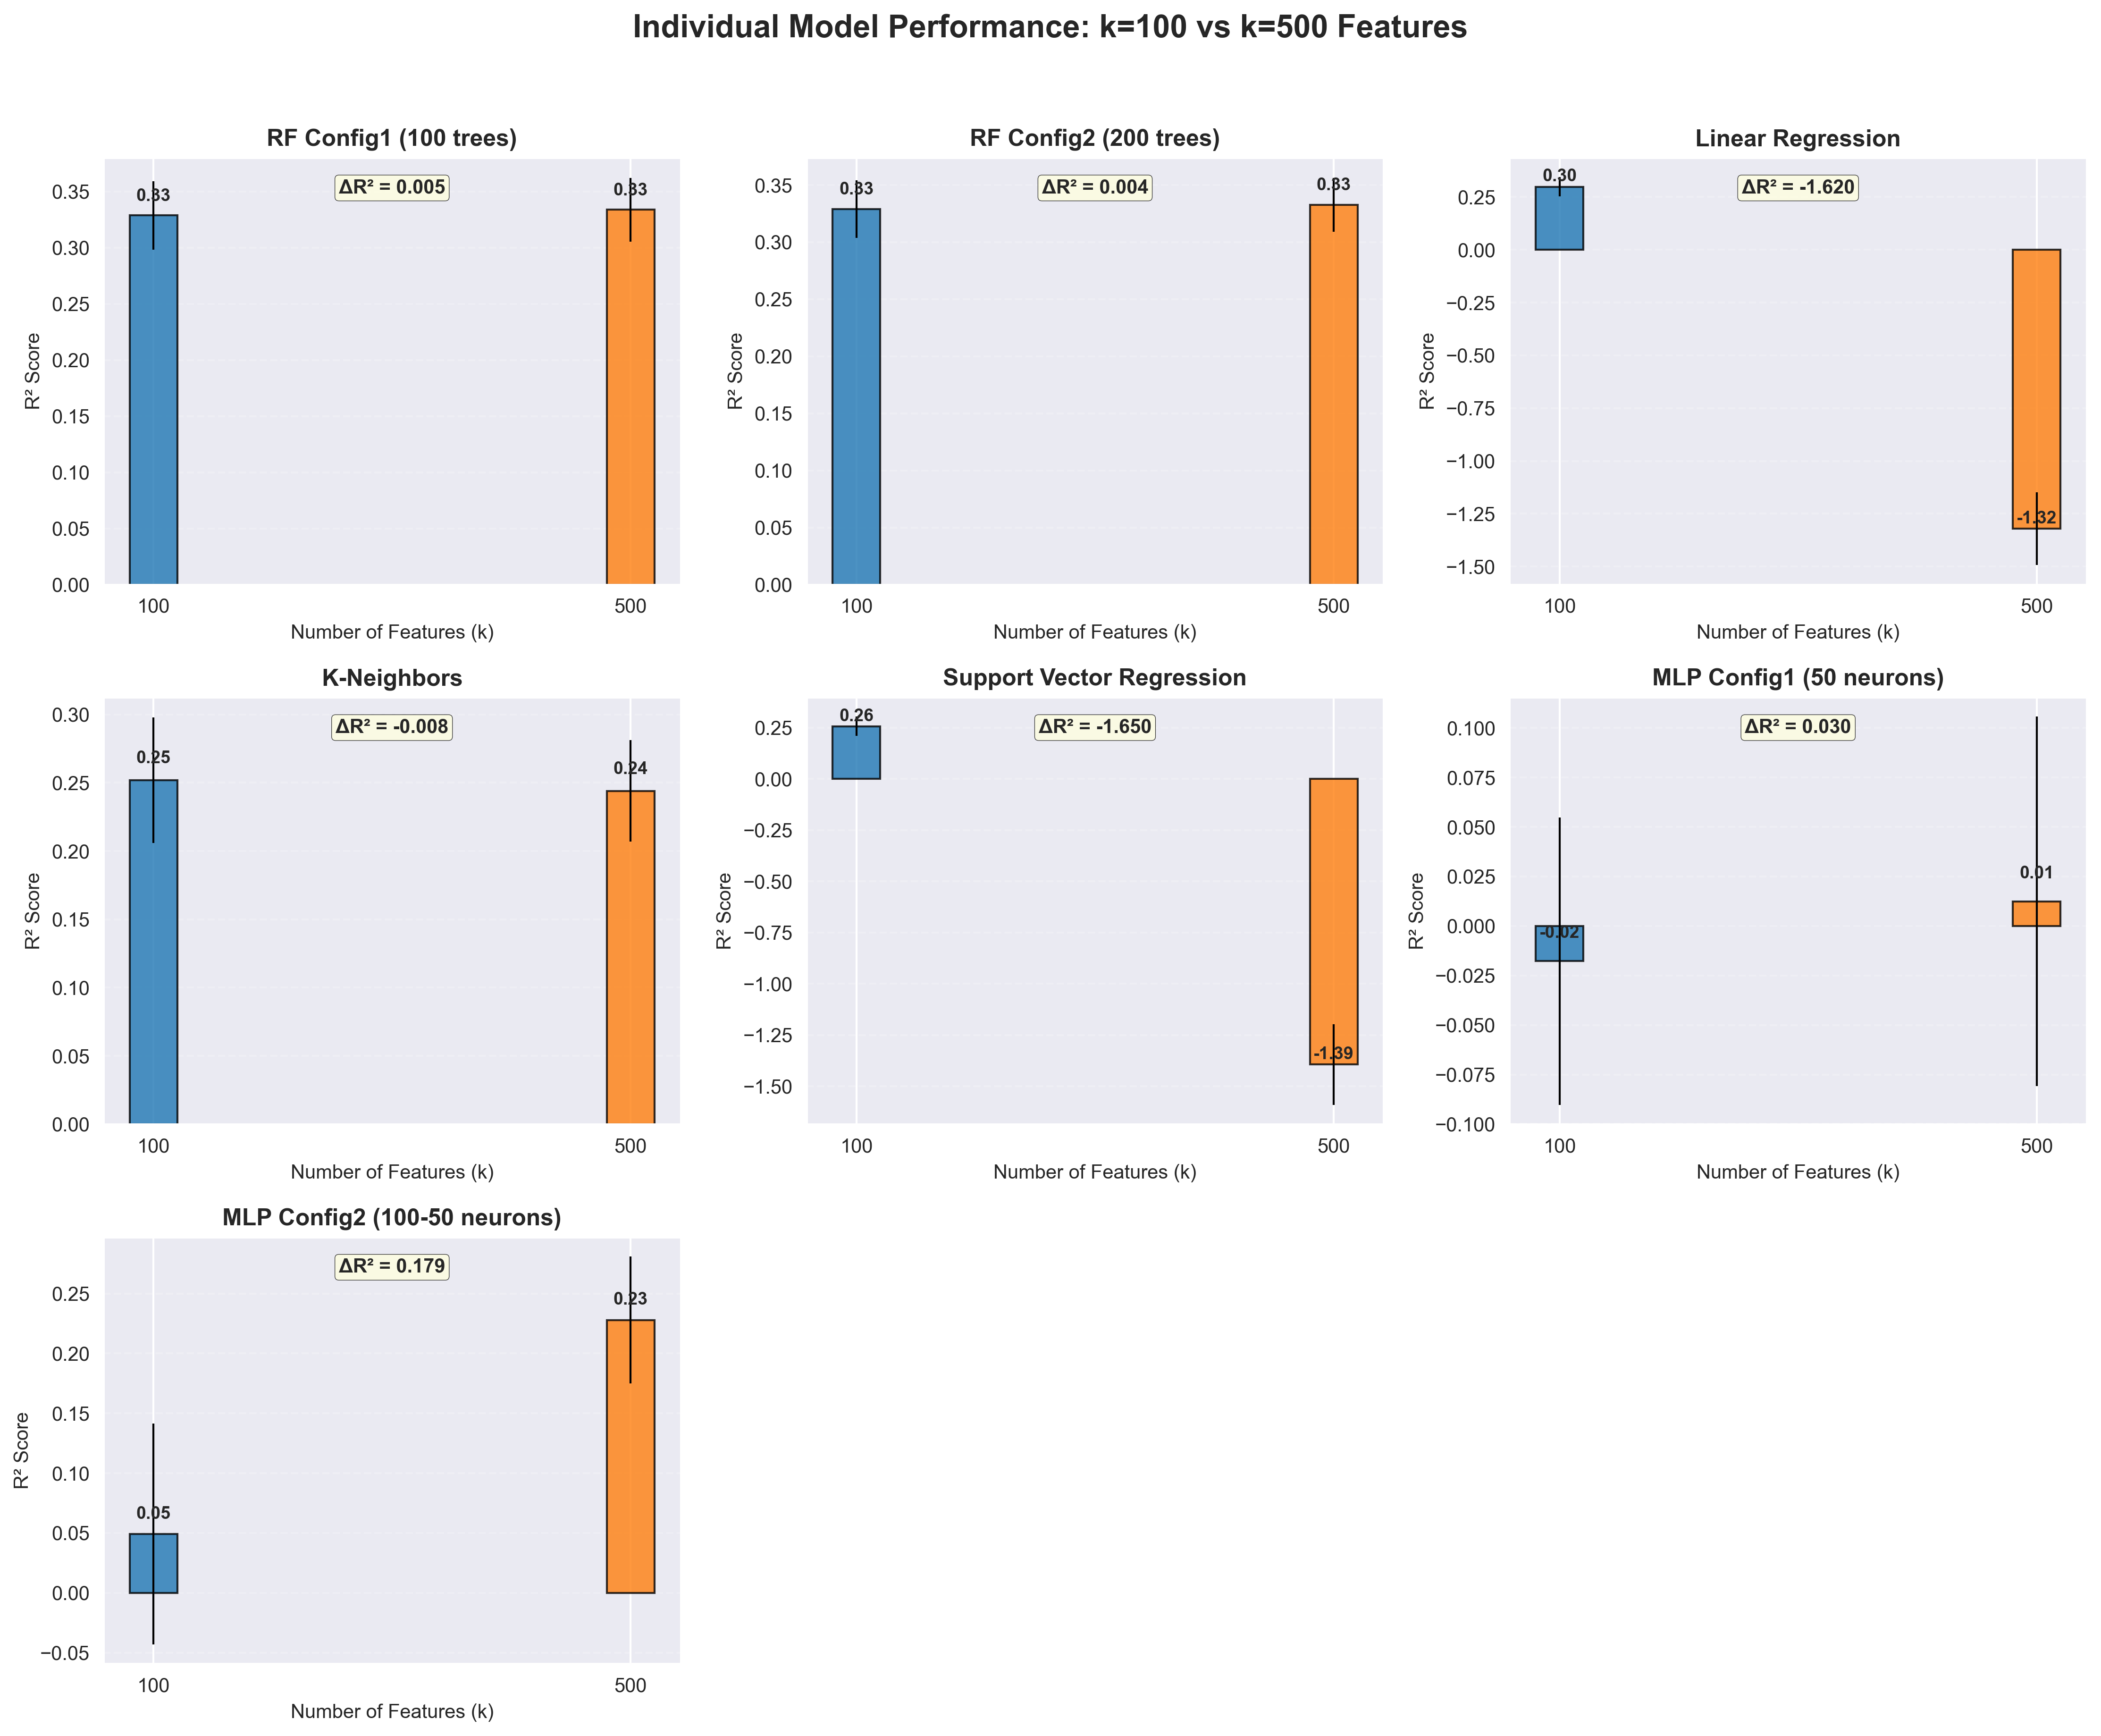

Created small multiples analysis for individual models


'Created small multiples analysis for individual models'

In [38]:
# IMPROVED VERSION 4: Small Multiples for Individual Model Analysis
save_and_print("### IMPROVED VERSION 4: Small Multiples Analysis", print_report_file, level="subsection")

# Calculate optimal subplot layout
n_models = len(models)
max_cols = 3
rows = (n_models + max_cols - 1) // max_cols

fig, axes = plt.subplots(rows, max_cols, figsize=(5*max_cols, 4*rows), dpi=300)
fig.suptitle('Individual Model Performance: k=100 vs k=500 Features', 
             fontsize=16, fontweight='bold', y=1.02)

# Flatten axes array for easier indexing
if rows == 1 and max_cols == 1:
    axes = np.array([axes])
axes = axes.flatten()

# Plot each model in its own subplot
for i, model in enumerate(models):
    ax = axes[i]
    model_data = k_performance_stats[k_performance_stats['model_name'] == model]
    
    if len(model_data) > 0:
        # Extract k=100 and k=500 data
        k100_data = model_data[model_data['k_value'] == 100]
        k500_data = model_data[model_data['k_value'] == 500]
        
        k_values_plot = [100, 500]
        means = []
        cis_lower = []
        cis_upper = []
        
        for k_val in k_values_plot:
            k_data = model_data[model_data['k_value'] == k_val]
            if len(k_data) > 0:
                means.append(k_data['mean'].iloc[0])
                cis_lower.append(k_data['ci_lower'].iloc[0])
                cis_upper.append(k_data['ci_upper'].iloc[0])
            else:
                means.append(0)
                cis_lower.append(0)
                cis_upper.append(0)
        
        # Plot the comparison
        bars = ax.bar(k_values_plot, means, color=['#1f77b4', '#ff7f0e'], 
                     alpha=0.8, edgecolor='black', linewidth=1, width=40)
        
        # Add error bars
        ax.errorbar(k_values_plot, means, 
                   yerr=[means[i] - cis_lower[i] for i in range(len(means))], 
                   fmt='none', ecolor='black', elinewidth=1, capsize=5)
        
        ax.set_title(model_labels[model], fontsize=12, fontweight='bold')
        ax.set_xlabel('Number of Features (k)', fontsize=10)
        ax.set_ylabel('R² Score', fontsize=10)
        ax.set_xticks(k_values_plot)
        ax.grid(axis='y', alpha=0.2, linestyle='--')
        
        # Add value labels
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Calculate and display the difference
        if len(means) == 2:
            delta = means[1] - means[0]
            ax.text(0.5, 0.95, f'ΔR² = {delta:.3f}', 
                    transform=ax.transAxes, ha='center', va='top',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow", alpha=0.8))

# Hide any unused subplots
for i in range(len(models), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig(f"{file_save_path}improved_small_multiples_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created small multiples analysis for individual models", print_report_file, level="info")

## Timing and Efficiency Analysis

In [ ]:
# Analyze computational time metrics
save_and_print("## Computational Time Analysis", print_report_file, level="section")

# Calculate time statistics for each model
time_stats = df_benchmark.groupby('model_name')[['feature_selection_time', 'model_training_time', 'prediction_time']].agg(['mean', 'std', 'count']).round(6)

save_and_print("Time Statistics by Model:", print_report_file, level="subsection")
save_and_print(time_stats.to_string(), print_report_file, level="info")

In [ ]:
# Create time comparison visualization
plt.figure(figsize=(14, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Calculate mean times for each model
time_means = df_benchmark.groupby('model_name')[['feature_selection_time', 'model_training_time', 'prediction_time']].mean()

# Create stacked bar plot for time components
bar_width = 0.6
x_pos = np.arange(len(models))

# Plot each time component
feature_selection_times = [time_means.loc[model, 'feature_selection_time'] for model in models]
training_times = [time_means.loc[model, 'model_training_time'] for model in models]
prediction_times = [time_means.loc[model, 'prediction_time'] for model in models]

# Create stacked bars
plt.bar(x_pos, feature_selection_times, bar_width, label='Feature Selection', 
        color='lightblue', edgecolor='black', linewidth=1)
plt.bar(x_pos, training_times, bar_width, bottom=feature_selection_times, 
        label='Model Training', color='lightgreen', edgecolor='black', linewidth=1)
plt.bar(x_pos, prediction_times, bar_width, 
        bottom=[feature_selection_times[i] + training_times[i] for i in range(len(models))],
        label='Prediction', color='lightcoral', edgecolor='black', linewidth=1)

plt.title('Computational Time Breakdown by Model', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Model', fontsize=14, fontweight='bold')
plt.ylabel('Time (seconds)', fontsize=14, fontweight='bold')
plt.xticks(x_pos, [model_labels[m] for m in models], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Component', fontsize=12, framealpha=0.9)
plt.grid(axis='y', alpha=0.2, linestyle='--')

# Add total time labels
total_times = [feature_selection_times[i] + training_times[i] + prediction_times[i] for i in range(len(models))]
for i, total_time in enumerate(total_times):
    plt.text(x_pos[i], total_time + 0.01, f'{total_time:.3f}s', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{file_save_path}time_breakdown_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created computational time breakdown visualization", print_report_file, level="info")

In [ ]:
# Create efficiency plot: Performance vs. Training Time
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Calculate mean performance and training time for each model
model_means = df_benchmark.groupby('model_name').agg({
    'model_performance': 'mean',
    'model_training_time': 'mean'
}).reset_index()

# Create scatter plot with model labels
for i, model in enumerate(models):
    model_data = model_means[model_means['model_name'] == model]
    if len(model_data) > 0:
        plt.scatter(model_data['model_training_time'], model_data['model_performance'],
                   color=color_mapping[model], s=100, alpha=0.8, 
                   edgecolor='black', linewidth=1)
        plt.annotate(model_labels[model], 
                    (model_data['model_training_time'].iloc[0], model_data['model_performance'].iloc[0]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

plt.title('Model Efficiency: Performance vs. Training Time', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mean Training Time (seconds)', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2, linestyle='--')

# Calculate correlation
correlation = df_benchmark['model_training_time'].corr(df_benchmark['model_performance'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig(f"{file_save_path}efficiency_plot_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created efficiency plot (performance vs. training time)", print_report_file, level="info")

In [ ]:
# Statistical analysis and significance testing
save_and_print("## Statistical Analysis and Significance Testing", print_report_file, level="section")

from scipy.stats import ttest_ind

# Perform pairwise model comparisons
model_comparisons = []
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i < j:
            model1_data = df_benchmark[df_benchmark['model_name'] == model1]['model_performance']
            model2_data = df_benchmark[df_benchmark['model_name'] == model2]['model_performance']
            
            if len(model1_data) > 0 and len(model2_data) > 0:
                t_stat, p_value = ttest_ind(model1_data, model2_data, equal_var=False)
                mean_diff = model1_data.mean() - model2_data.mean()
                
                model_comparisons.append({
                    'model1': model1,
                    'model2': model2,
                    'model1_label': model_labels[model1],
                    'model2_label': model_labels[model2],
                    'mean_difference': mean_diff,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05
                })

# Create comparison table
comparison_df = pd.DataFrame(model_comparisons)
save_and_print("Pairwise Model Comparisons (Performance):", print_report_file, level="subsection")
save_and_print(comparison_df.round(4).to_string(index=False), print_report_file, level="info")

## K-Group Performance Analysis

## K-Group Performance Analysis
Creating k-group specific visualizations with large font sizes...
Detected k-values: [np.int64(100), np.int64(500)]
### Individual K-Group Performance Bar Plots
Creating visualization for k=100...


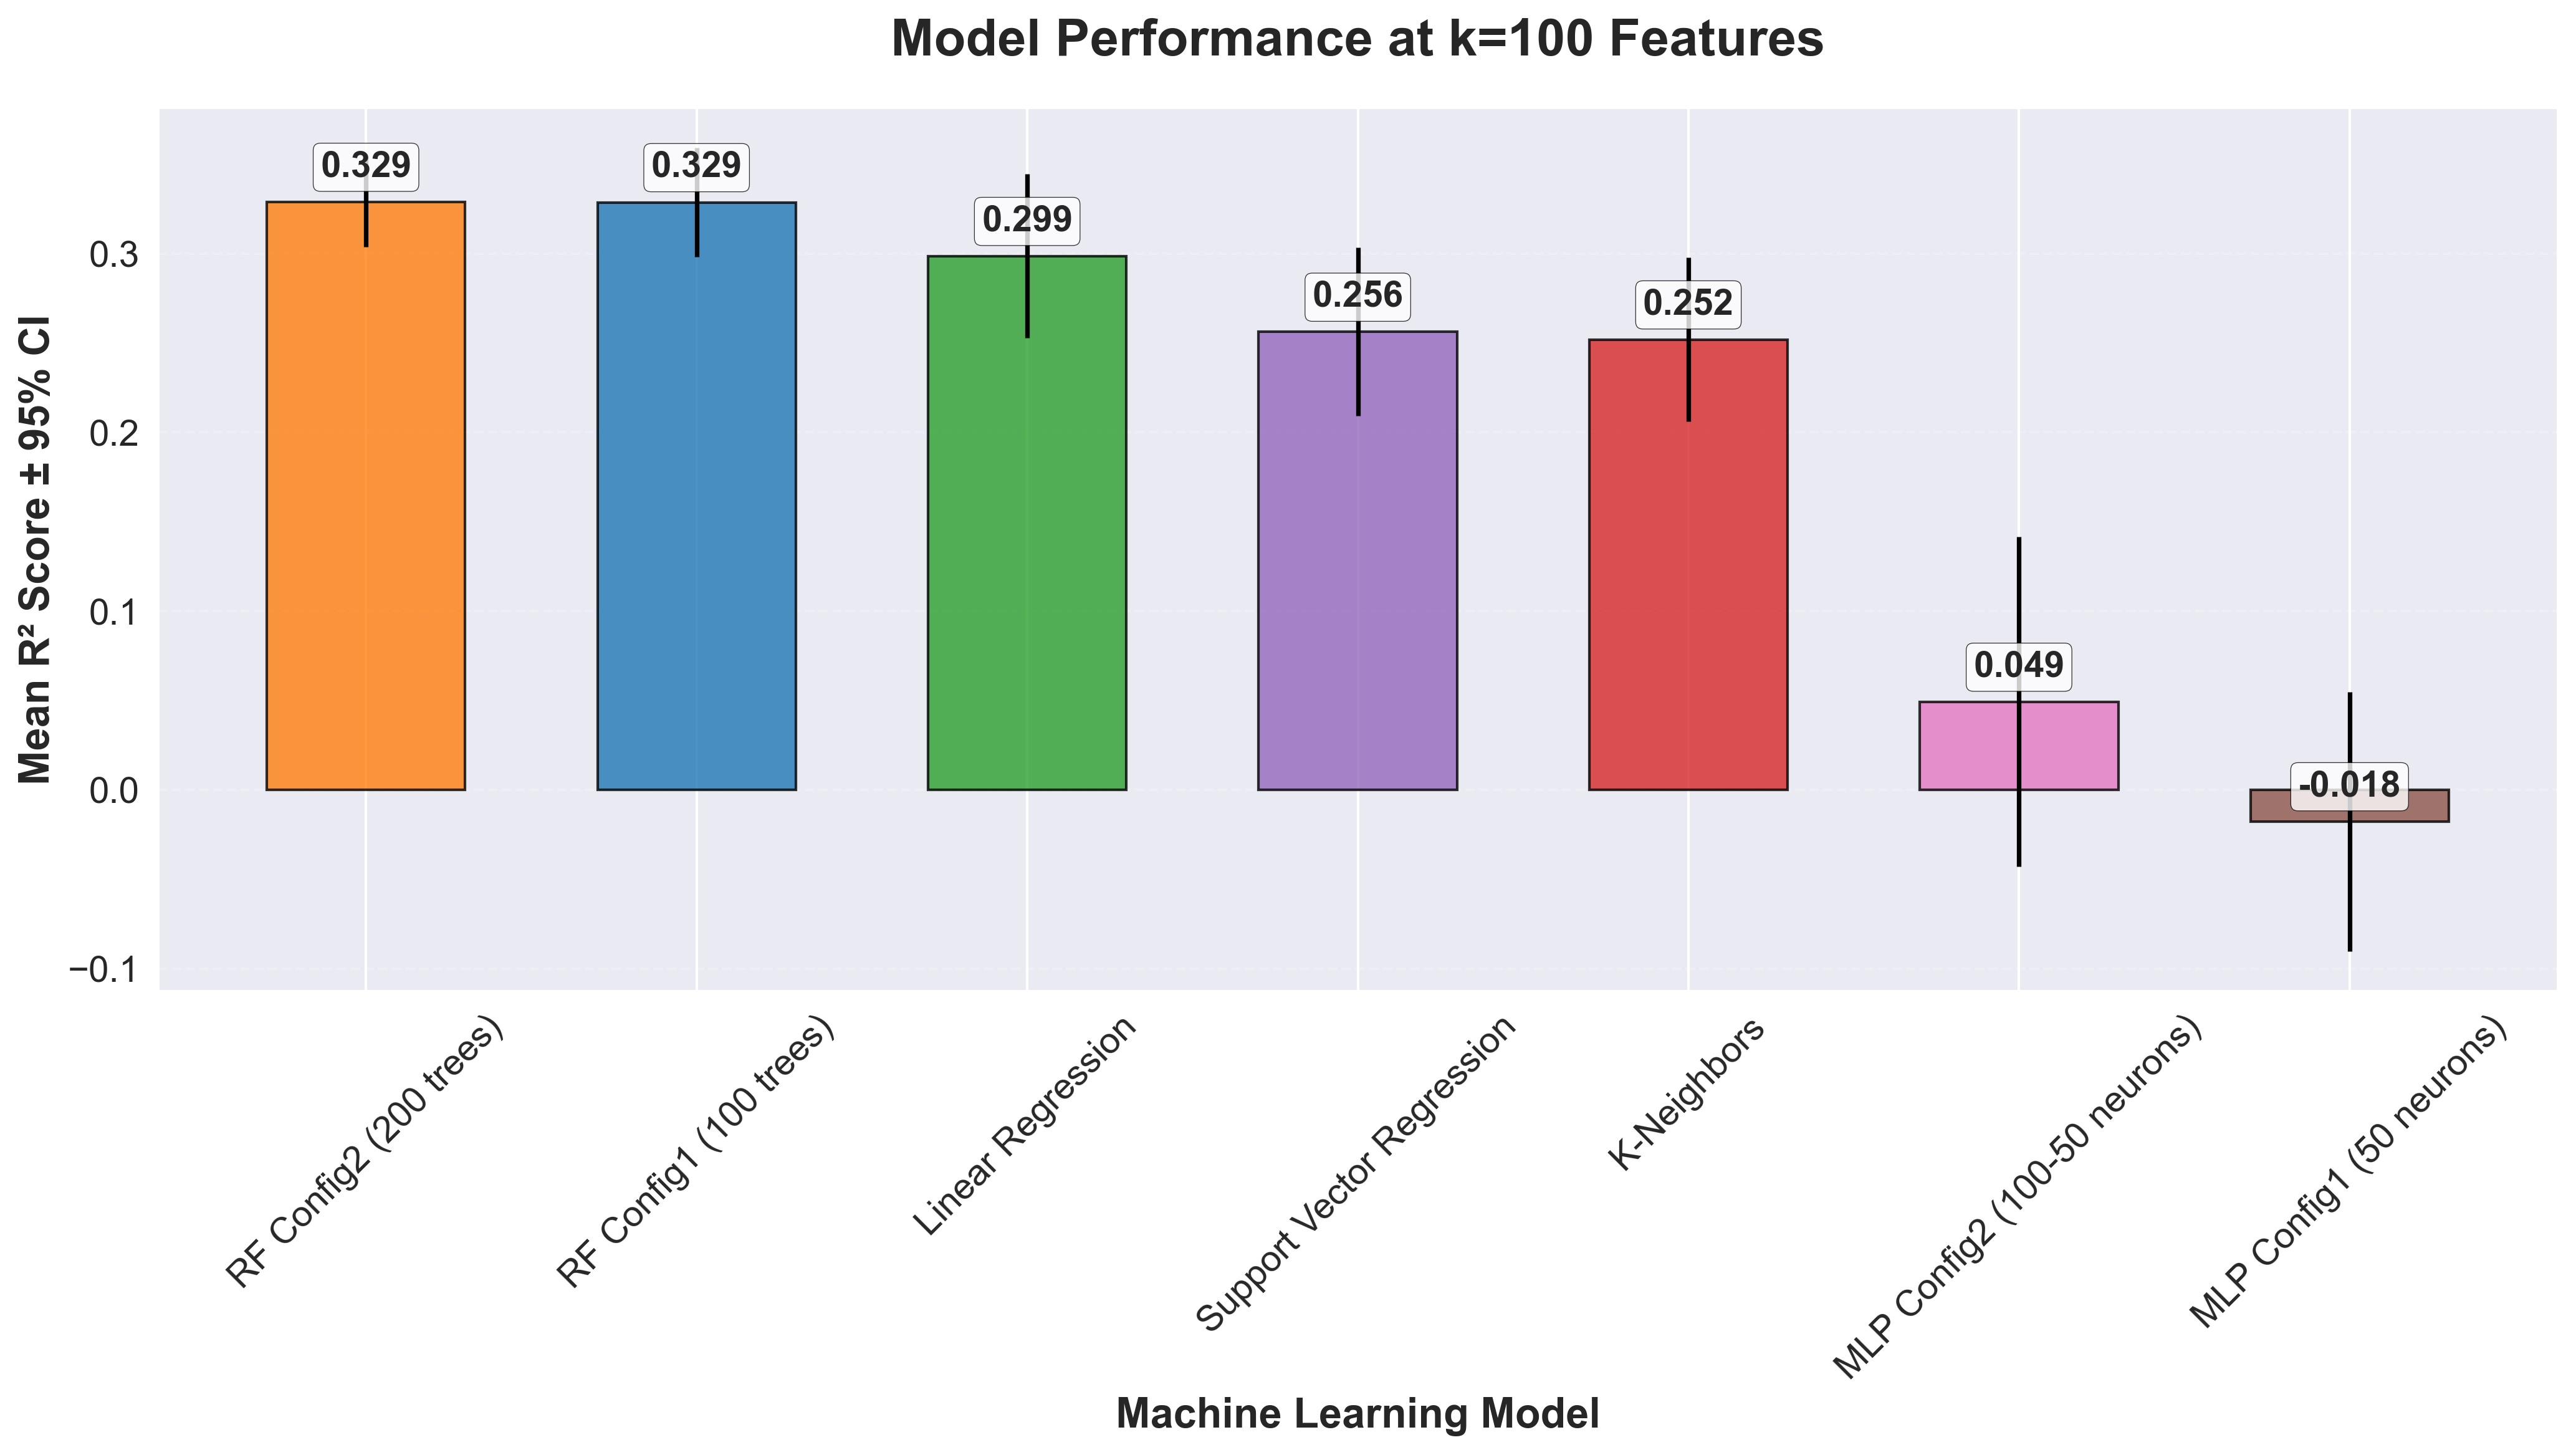

Created k=100 performance bar plot: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult5-ModelSelectionBenchmark/k_group_performance_k100_v1_fixed_network_mrmr_d3.png
Creating visualization for k=500...


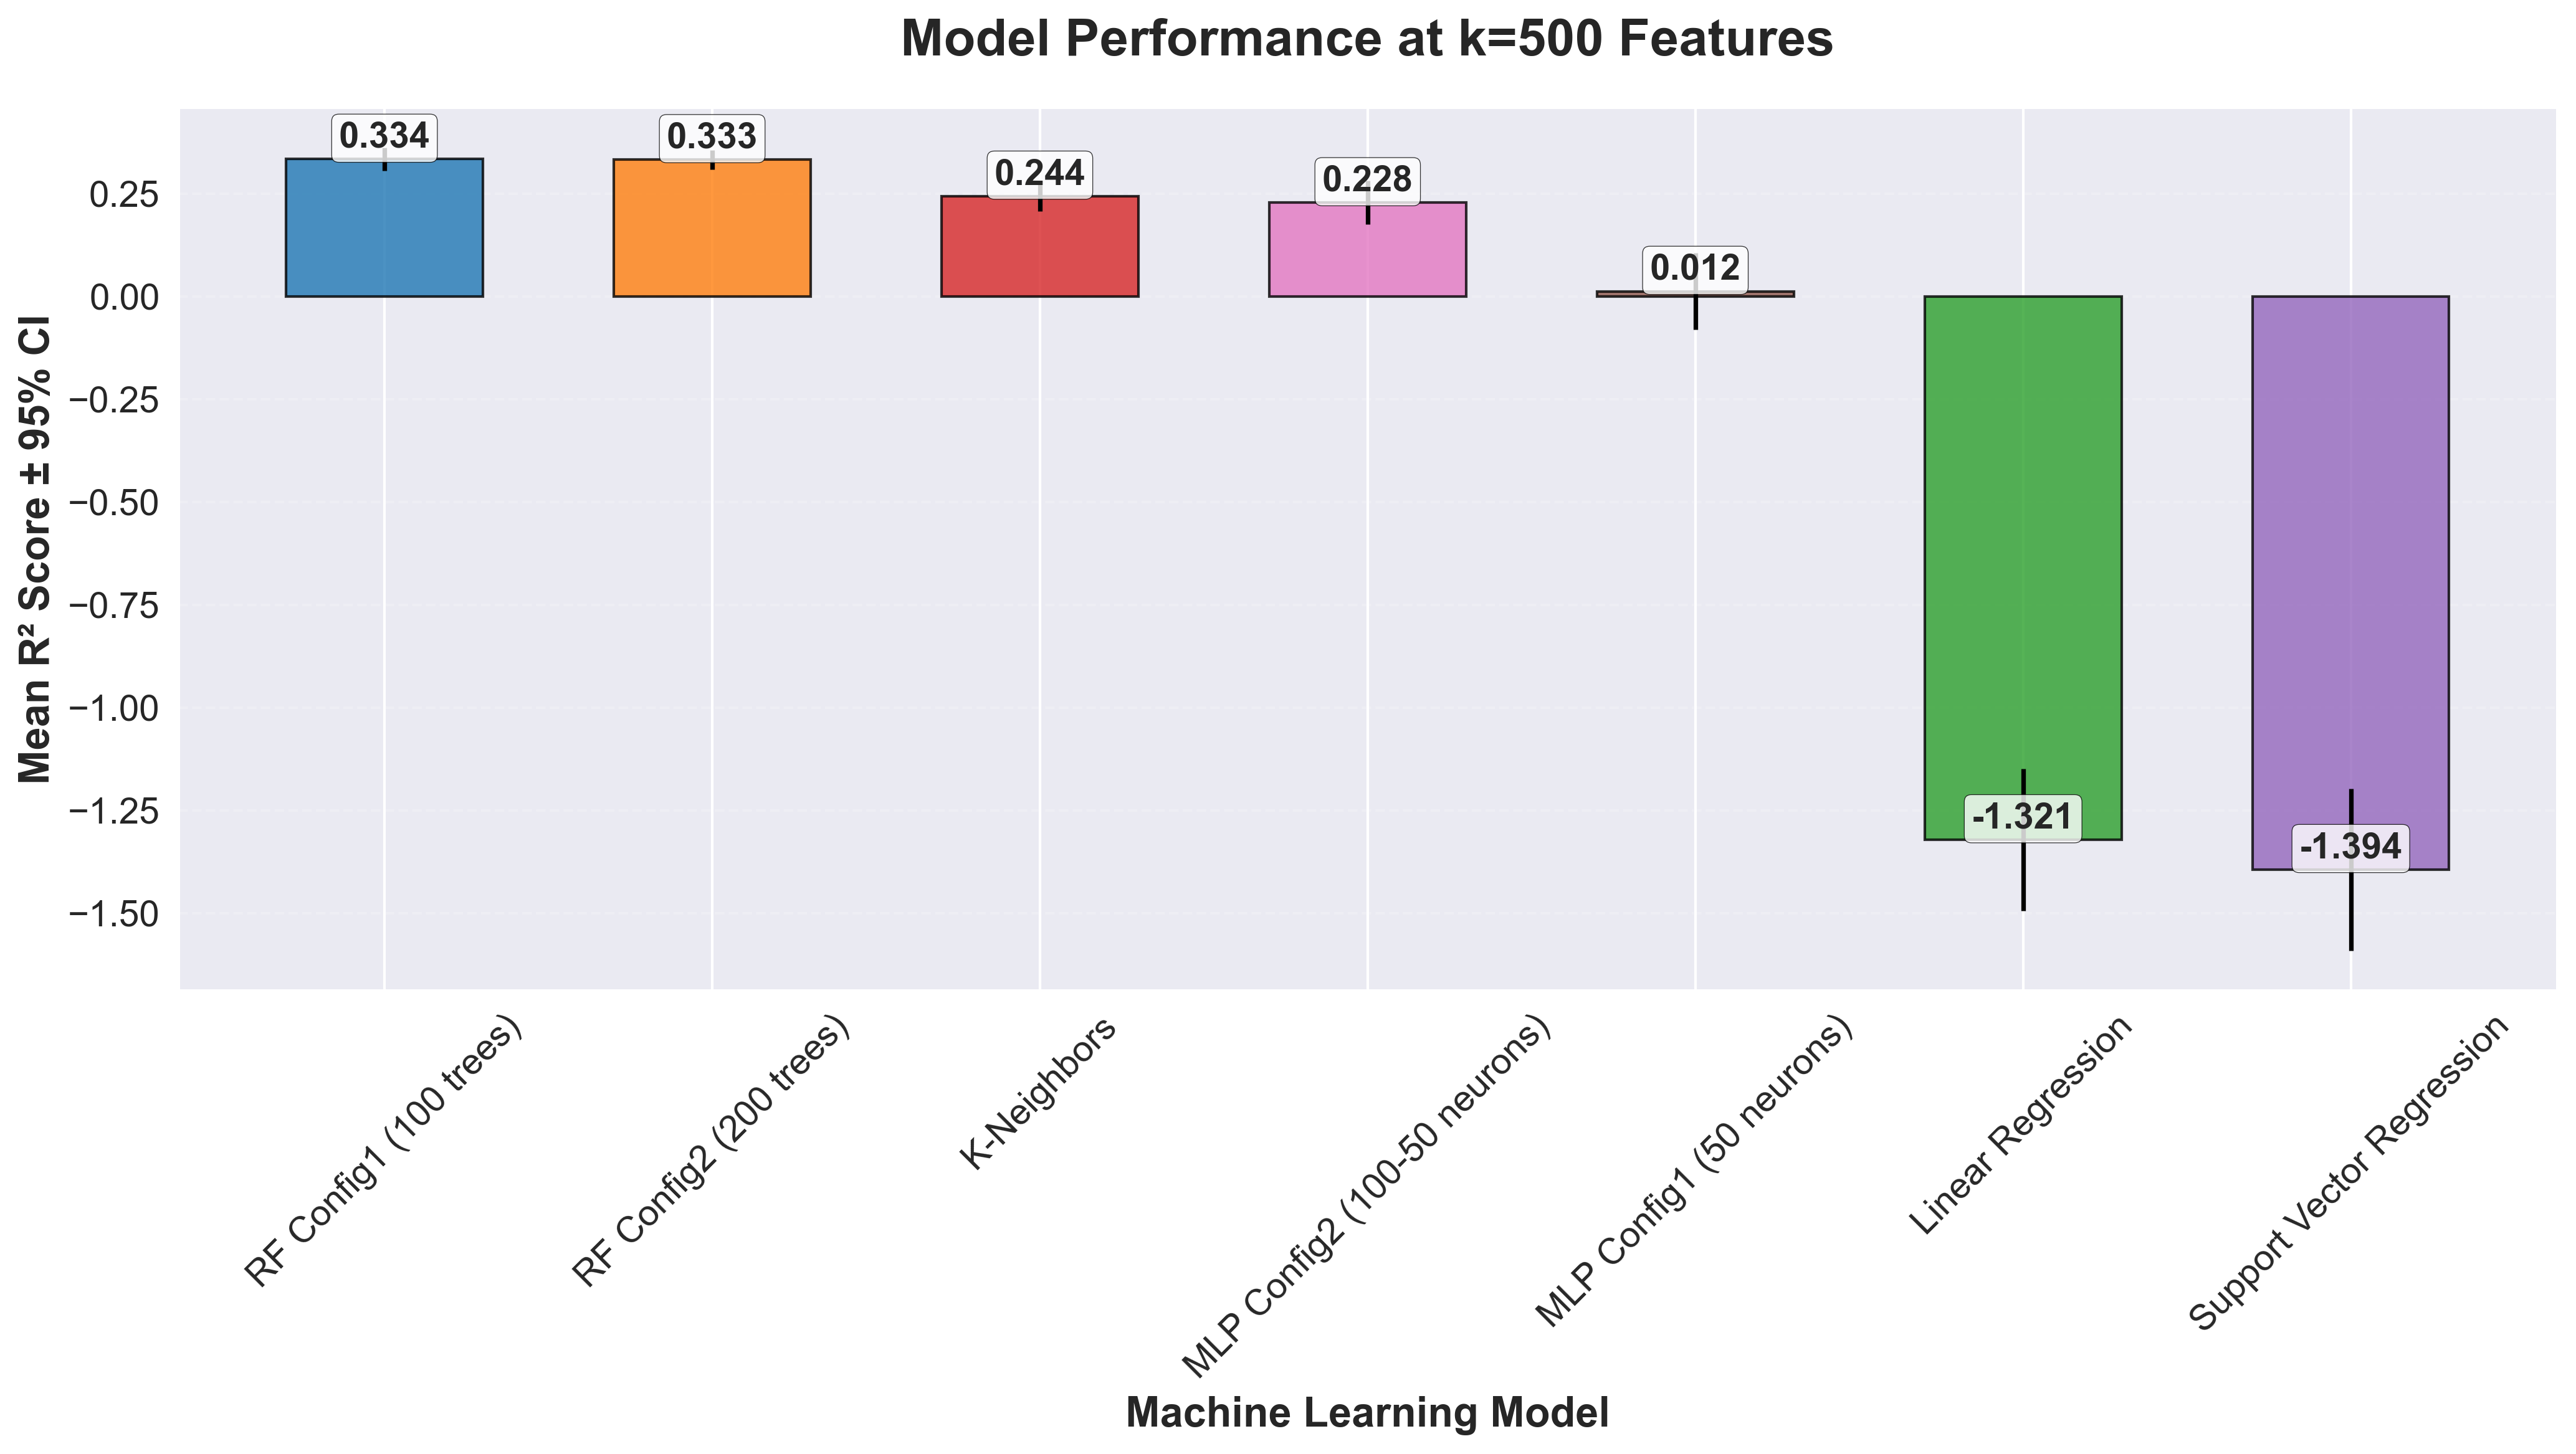

Created k=500 performance bar plot: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult5-ModelSelectionBenchmark/k_group_performance_k500_v1_fixed_network_mrmr_d3.png
### Comparative K-Group Analysis


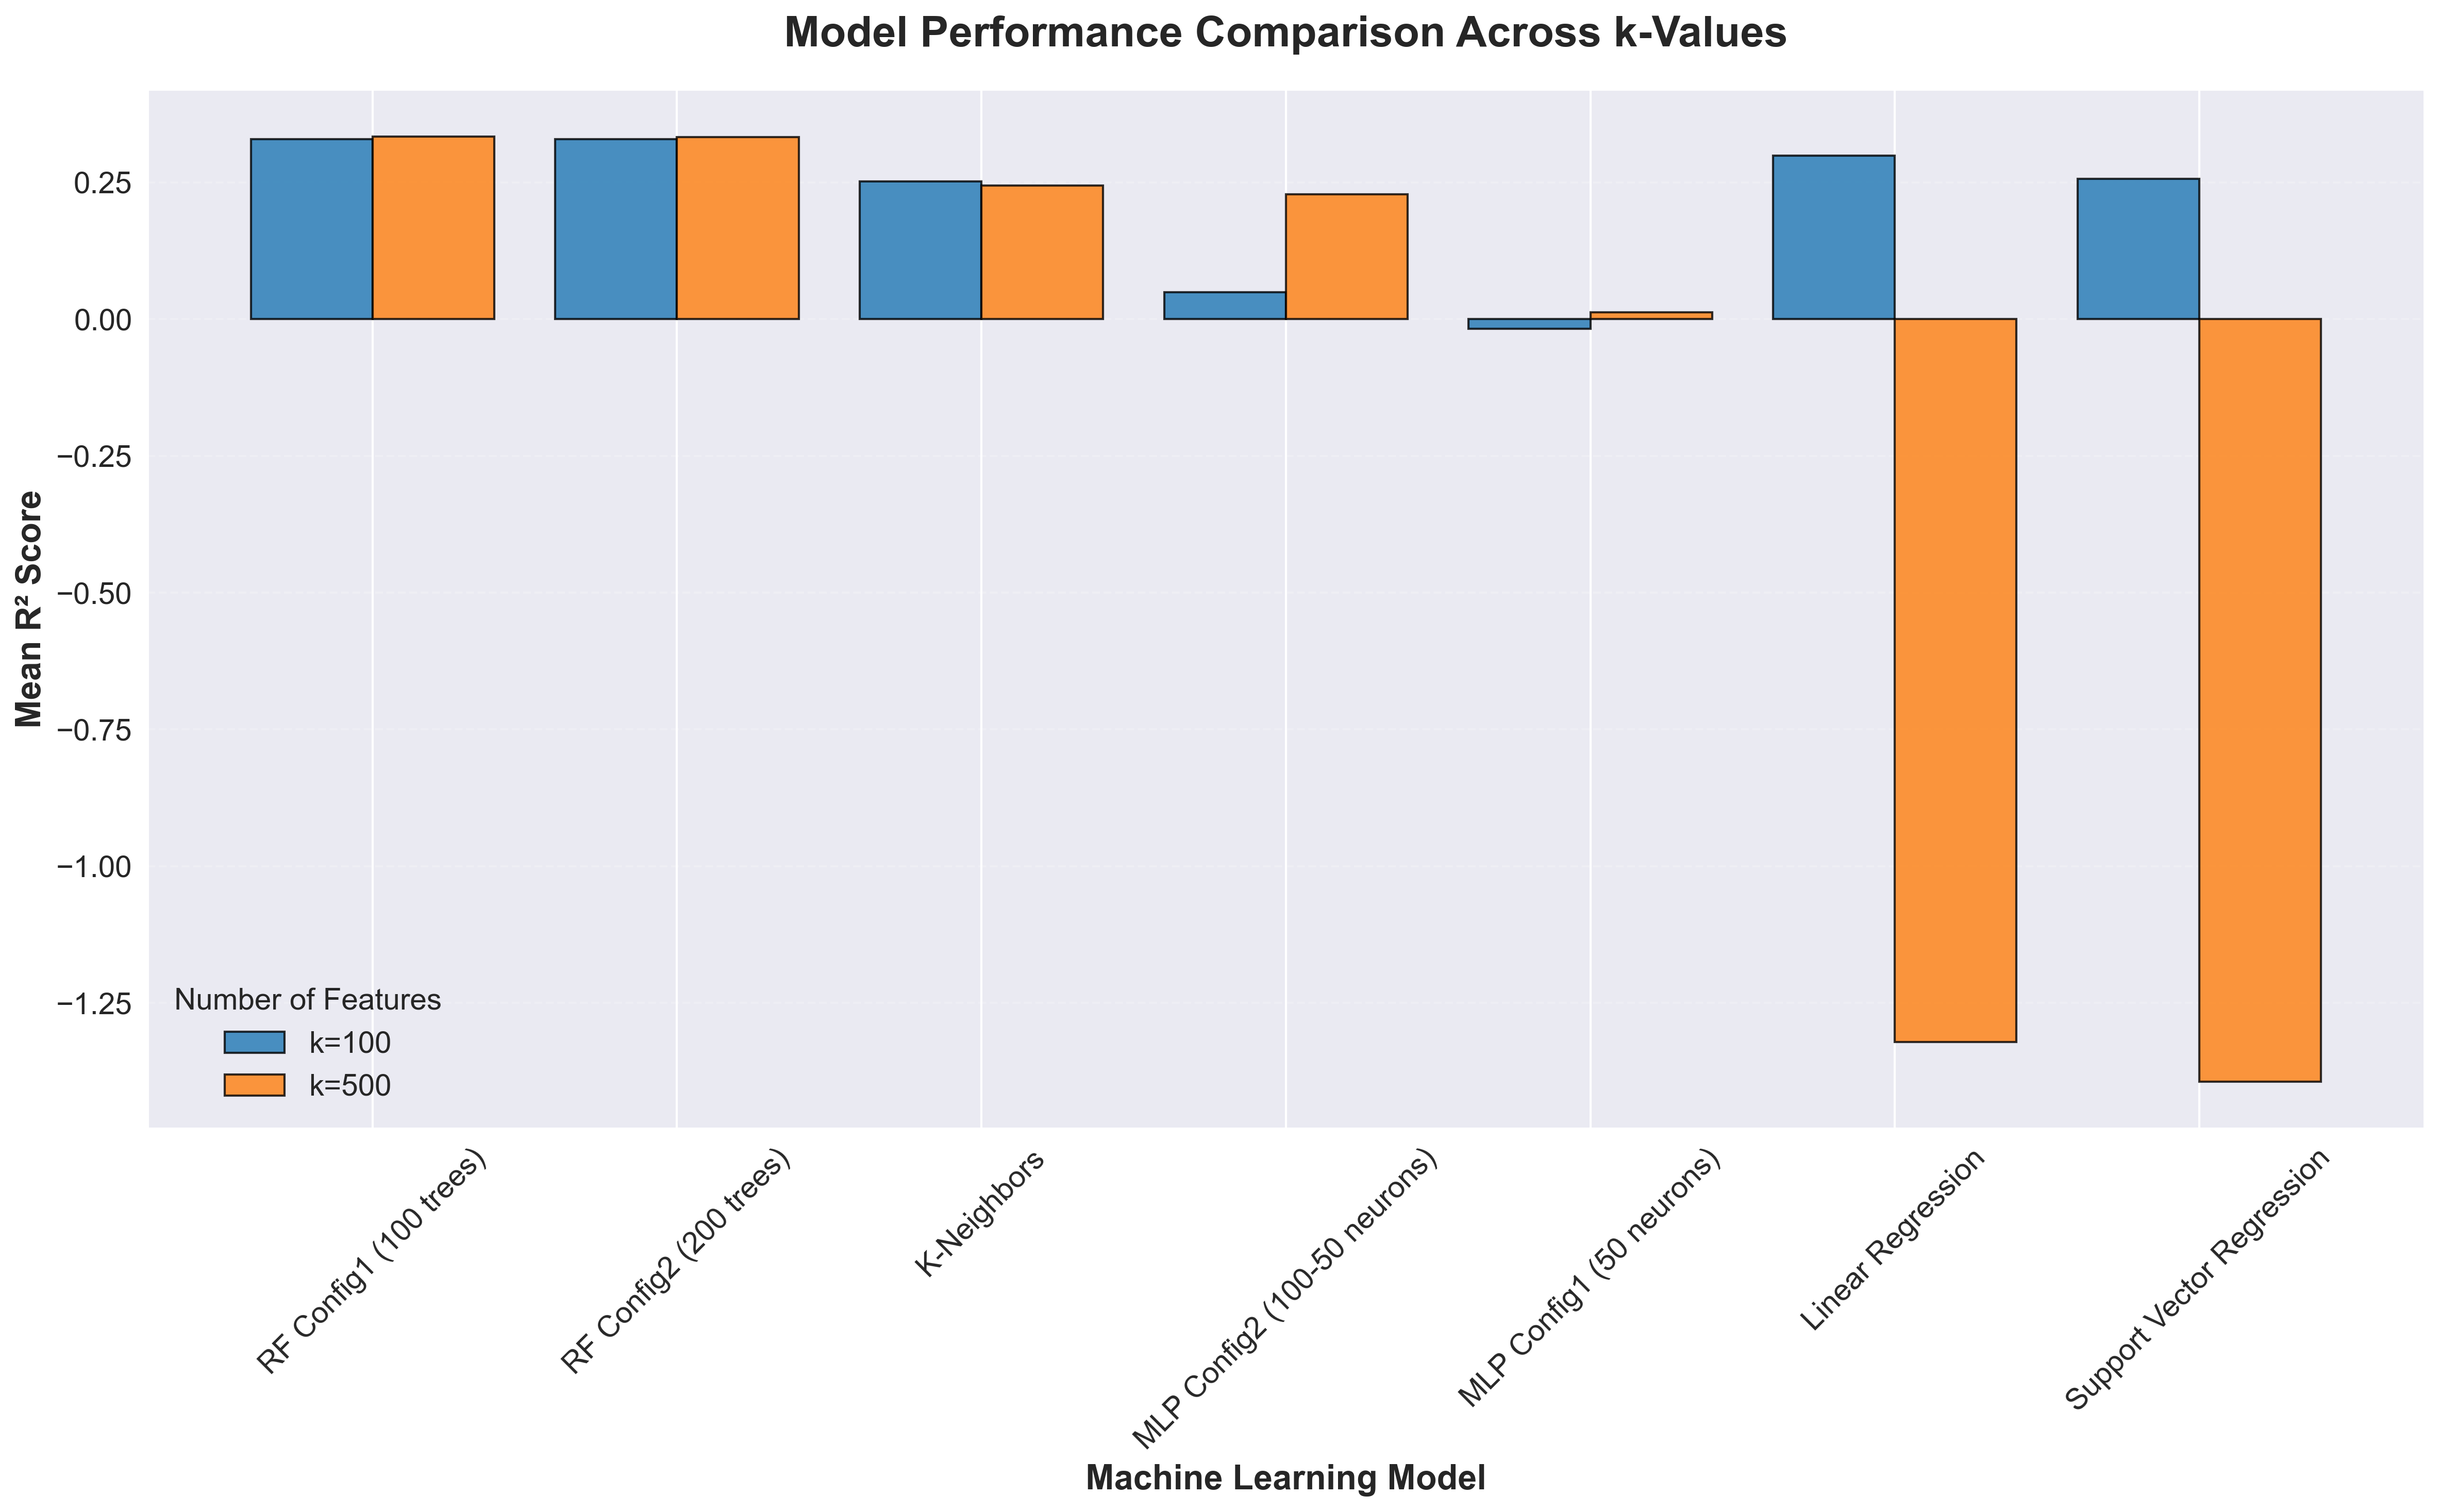

Created k-group comparison plot: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult5-ModelSelectionBenchmark/k_group_comparison_all_v1_fixed_network_mrmr_d3.png
### K-Group Statistical Analysis
k=100 Performance Statistics:
                               count    mean     std     min  median     max
model_name                                                                  
KNeighborsRegressor               20  0.2518  0.1046 -0.0137  0.2430  0.4047
LinearRegression                  20  0.2985  0.1046  0.1120  0.3068  0.5004
MLPRegressor_config1              20 -0.0177  0.1656 -0.4861  0.0230  0.2689
MLPRegressor_config2              20  0.0491  0.2105 -0.3849  0.0722  0.3861
RandomForestRegressor_config1     20  0.3286  0.0699  0.2095  0.3327  0.4289
RandomForestRegressor_config2     20  0.3288  0.0576  0.2196  0.3323  0.4291
SVR                               20  0.2561  0.1075  0.0207  0.2322  0.4533
Best model at k=100: Linear Regression (R² = 0.5004

In [26]:
# K-Group Analysis Section
save_and_print("## K-Group Performance Analysis", print_report_file, level="section")
save_and_print("Creating k-group specific visualizations with large font sizes...", print_report_file, level="info")

# Dynamically detect k-values (following Principle 1: Dynamic Detection)
k_values = sorted(df_benchmark['k_value'].unique())
save_and_print(f"Detected k-values: {k_values}", print_report_file, level="info")

# Create k-group specific analysis functions following guidelines
def create_k_group_bar_plot(df_benchmark, k_value, file_save_path, exp_id, font_sizes=None):
    """
    Create individual k-group performance bar plot with large font sizes
    Following Principle 4: Centralized Color and Marker Mapping
    """
    if font_sizes is None:
        font_sizes = {
            'title': 20, 'axis_label': 16, 'tick': 14, 
            'value': 14, 'legend': 14, 'annotation': 12
        }
    
    # Filter data for specific k-value
    k_data = df_benchmark[df_benchmark['k_value'] == k_value]
    
    if len(k_data) == 0:
        save_and_print(f"No data found for k={k_value}", print_report_file, level="info")
        return
    
    # Calculate performance statistics for this k-group
    k_stats = k_data.groupby('model_name')['model_performance'].agg(['mean', 'std', 'count']).reset_index()
    
    # Calculate 95% confidence intervals
    k_stats['ci_lower'] = k_stats['mean'] - 1.96 * k_stats['std'] / np.sqrt(k_stats['count'])
    k_stats['ci_upper'] = k_stats['mean'] + 1.96 * k_stats['std'] / np.sqrt(k_stats['count'])
    
    # Sort by performance for better visualization
    k_stats = k_stats.sort_values('mean', ascending=False)
    
    # Create publication-quality bar plot with large fonts
    plt.figure(figsize=(14, 8), dpi=300)
    plt.rcParams['font.family'] = 'sans'
    plt.rcParams['font.size'] = font_sizes['tick']
    plt.rcParams['axes.linewidth'] = 1.2
    
    # Use consistent color mapping (Principle 4) with error handling
    bar_colors = []
    for model in k_stats['model_name']:
        if model in color_mapping:
            bar_colors.append(color_mapping[model])
        else:
            # Use a default color if model not found in mapping
            bar_colors.append('#808080')  # Gray as default

    # Create bars with error bars (95% CI)
    x_pos = np.arange(len(k_stats))
    bars = plt.bar(x_pos, k_stats['mean'], 
                   yerr=[k_stats['mean'] - k_stats['ci_lower'], k_stats['ci_upper'] - k_stats['mean']],
                   capsize=8, alpha=0.8, color=bar_colors, 
                   edgecolor='black', linewidth=1, width=0.6)

    # Apply large font sizes
    plt.title(f'Model Performance at k={k_value} Features', 
              fontsize=font_sizes['title'], fontweight='bold', pad=20)
    plt.xlabel('Machine Learning Model', fontsize=font_sizes['axis_label'], fontweight='bold')
    plt.ylabel('Mean R² Score ± 95% CI', fontsize=font_sizes['axis_label'], fontweight='bold')
    plt.xticks(x_pos, [model_labels[model] for model in k_stats['model_name']], 
               rotation=45, fontsize=font_sizes['tick'])
    plt.yticks(fontsize=font_sizes['tick'])

    # Add value labels with large fonts
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', 
                 fontsize=font_sizes['value'], fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    plt.grid(axis='y', alpha=0.2, linestyle='--')
    plt.tight_layout()

    # Save with k-specific filename
    filename = f"{file_save_path}k_group_performance_k{k_value}_{exp_id}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    save_and_print(f"Created k={k_value} performance bar plot: {filename}", print_report_file, level="info")
    return k_stats

def create_k_group_comparison_plot(df_benchmark, k_values, file_save_path, exp_id, font_sizes=None):
    """
    Create comparative k-group bar plot showing all k-values together
    Following Principle 5: Dynamic Subplot Layout
    """
    if font_sizes is None:
        font_sizes = {
            'title': 20, 'axis_label': 16, 'tick': 14, 
            'value': 14, 'legend': 14, 'annotation': 12
        }
    
    # Calculate performance statistics for each k-value
    k_comparison_data = []
    for k_value in k_values:
        k_data = df_benchmark[df_benchmark['k_value'] == k_value]
        if len(k_data) > 0:
            k_stats = k_data.groupby('model_name')['model_performance'].agg(['mean', 'std', 'count']).reset_index()
            k_stats['k_value'] = k_value
            k_comparison_data.append(k_stats)
    
    if len(k_comparison_data) == 0:
        save_and_print("No data available for k-group comparison", print_report_file, level="info")
        return
    
    # Combine all k-group data
    comparison_df = pd.concat(k_comparison_data, ignore_index=True)
    
    # Create publication-quality grouped bar plot
    plt.figure(figsize=(16, 10), dpi=300)
    plt.rcParams['font.family'] = 'sans'
    plt.rcParams['font.size'] = font_sizes['tick']
    plt.rcParams['axes.linewidth'] = 1.2
    
    # Use consistent model ordering (sorted by overall performance)
    model_order = df_benchmark.groupby('model_name')['model_performance'].mean().sort_values(ascending=False).index
    
    # Create grouped bar positions
    bar_width = 0.8 / len(k_values)  # Dynamic width based on number of k-values
    x_pos = np.arange(len(model_order))
    
    # Plot bars for each k-value
    for i, k_value in enumerate(k_values):
        k_data = comparison_df[comparison_df['k_value'] == k_value]
        
        # Ensure data is in correct order
        k_means = []
        for model in model_order:
            model_data = k_data[k_data['model_name'] == model]
            if len(model_data) > 0:
                k_means.append(model_data['mean'].iloc[0])
            else:
                k_means.append(0)
        
        # Use distinct colors for each k-value
        k_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'][:len(k_values)]
        bars = plt.bar(x_pos + i * bar_width, k_means, bar_width,
                       color=k_colors[i], alpha=0.8, edgecolor='black', linewidth=1,
                       label=f'k={k_value}')
    
    # Apply large font sizes
    plt.title('Model Performance Comparison Across k-Values', 
              fontsize=font_sizes['title'], fontweight='bold', pad=20)
    plt.xlabel('Machine Learning Model', fontsize=font_sizes['axis_label'], fontweight='bold')
    plt.ylabel('Mean R² Score', fontsize=font_sizes['axis_label'], fontweight='bold')
    plt.xticks(x_pos + bar_width * (len(k_values) - 1) / 2, 
               [model_labels[model] for model in model_order], 
               rotation=45, fontsize=font_sizes['tick'])
    plt.yticks(fontsize=font_sizes['tick'])
    plt.legend(title='Number of Features', fontsize=font_sizes['legend'], framealpha=0.9)
    
    plt.grid(axis='y', alpha=0.2, linestyle='--')
    plt.tight_layout()
    
    # Save comparison plot
    filename = f"{file_save_path}k_group_comparison_all_{exp_id}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print(f"Created k-group comparison plot: {filename}", print_report_file, level="info")
    return comparison_df

# Define large font sizes as requested
large_font_sizes = {
    'title': 20, 'axis_label': 16, 'tick': 14, 
    'value': 14, 'legend': 14, 'annotation': 12
}

# Create individual k-group bar plots with error handling
save_and_print("### Individual K-Group Performance Bar Plots", print_report_file, level="subsection")
k_group_stats = {}
for k_value in k_values:
    save_and_print(f"Creating visualization for k={k_value}...", print_report_file, level="info")
    try:
        stats = create_k_group_bar_plot(df_benchmark, k_value, file_save_path, exp_id, large_font_sizes)
        k_group_stats[k_value] = stats
    except Exception as e:
        save_and_print(f"Error creating k={k_value} bar plot: {e}", print_report_file, level="info")
        continue

# Create comparative k-group plot with error handling
save_and_print("### Comparative K-Group Analysis", print_report_file, level="subsection")
try:
    comparison_results = create_k_group_comparison_plot(df_benchmark, k_values, file_save_path, exp_id, large_font_sizes)
except Exception as e:
    save_and_print(f"Error creating comparative k-group plot: {e}", print_report_file, level="info")

# Statistical analysis for each k-group with error handling
save_and_print("### K-Group Statistical Analysis", print_report_file, level="subsection")
for k_value in k_values:
    k_data = df_benchmark[df_benchmark['k_value'] == k_value]
    if len(k_data) > 0:
        save_and_print(f"k={k_value} Performance Statistics:", print_report_file, level="info")
        try:
            k_summary = k_data.groupby('model_name')['model_performance'].agg([
                ('count', 'count'), ('mean', 'mean'), ('std', 'std'),
                ('min', 'min'), ('median', 'median'), ('max', 'max')
            ]).round(4)
            save_and_print(k_summary.to_string(), print_report_file, level="info")
            
            # Best performing model for this k-group with error handling
            if len(k_data) > 0:
                best_model_idx = k_data['model_performance'].idxmax()
                if pd.notna(best_model_idx):
                    best_model = k_data.loc[best_model_idx, 'model_name']
                    best_performance = k_data['model_performance'].max()
                    save_and_print(f"Best model at k={k_value}: {model_labels[best_model]} (R² = {best_performance:.4f})", 
                                print_report_file, level="info")
                else:
                    save_and_print(f"No valid best model found for k={k_value}", print_report_file, level="info")
        except Exception as e:
            save_and_print(f"Error analyzing k={k_value} statistics: {e}", print_report_file, level="info")

In [27]:
# Identify best performing model for each k-value
save_and_print("## Best Performing Models by k-value", print_report_file, level="section")

for k_value in k_values:
    k_data = df_benchmark[df_benchmark['k_value'] == k_value]
    if len(k_data) > 0:
        best_model_row = k_data.loc[k_data['model_performance'].idxmax()]
        best_model = best_model_row['model_name']
        best_performance = best_model_row['model_performance']
        
        save_and_print(f"k={k_value}:", print_report_file, level="subsection")
        save_and_print(f"  Best model: {model_labels[best_model]}", print_report_file, level="info")
        save_and_print(f"  Best performance (R²): {best_performance:.4f}", print_report_file, level="info")

## Best Performing Models by k-value
k=100:
  Best model: Linear Regression
  Best performance (R²): 0.5004
k=500:
  Best model: RF Config1 (100 trees)
  Best performance (R²): 0.4332


In [28]:
# Generate comprehensive summary report
save_and_print("## Comprehensive Summary", print_report_file, level="section")

# Overall best model
overall_best_row = df_benchmark.loc[df_benchmark['model_performance'].idxmax()]
overall_best_model = overall_best_row['model_name']
overall_best_performance = overall_best_row['model_performance']
overall_best_k = overall_best_row['k_value']

save_and_print("### Overall Best Model", print_report_file, level="subsection")
save_and_print(f"Best overall model: {model_labels[overall_best_model]}", print_report_file, level="info")
save_and_print(f"Best overall performance (R²): {overall_best_performance:.4f}", print_report_file, level="info")
save_and_print(f"At k-value: {overall_best_k}", print_report_file, level="info")

# Performance range
performance_range = df_benchmark['model_performance'].max() - df_benchmark['model_performance'].min()
save_and_print(f"Performance range across all models: {performance_range:.4f}", print_report_file, level="info")

# Time efficiency analysis
fastest_model_time = df_benchmark.groupby('model_name')['model_training_time'].mean().idxmin()
fastest_time = df_benchmark.groupby('model_name')['model_training_time'].mean().min()
save_and_print(f"Fastest training model: {model_labels[fastest_model_time]} ({fastest_time:.3f}s)", print_report_file, level="info")

print(f"Print report saved to: {print_report_path}")

## Comprehensive Summary
### Overall Best Model
Best overall model: Linear Regression
Best overall performance (R²): 0.5004
At k-value: 100
Performance range across all models: 3.1315
Fastest training model: K-Neighbors (0.005s)
Print report saved to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult5-ModelSelectionBenchmark/model_selection_print_report_v1_fixed_network_mrmr_d3.md


In [29]:
print("Model selection benchmarking visualization completed successfully!")

Model selection benchmarking visualization completed successfully!
